In [96]:
from trout.stars import get_star
from trout.conversions import flux_to_magnitude_4px

import matplotlib.pyplot as plt
import numpy as np
import random

In [97]:
def show_chart(star_no):
    years = range(2003, 2022)
    
    idl_data = get_star(star_no)
    python_data = get_star(star_no, is_primary=False)
    
    idl_median = {}
    idl_std = {}
    python_median = {}
    python_std = {}
    
    for year in years:
        idl_data.select_year(year)
        python_data.select_year(year)
        
        idl_year_data = idl_data.get_selected_data_column()
        if len(idl_year_data) > 0:
            idl_median[year] = np.mean(idl_year_data)
            idl_std[year] = np.std(idl_year_data)
            
        python_year_data = python_data.get_selected_data_column()
        if len(python_year_data) > 0:
            python_median[year] = np.mean(python_year_data)
            python_std[year] = np.std(python_year_data)
            
    idl_years = list(idl_median.keys())
    idl_median_lst = [idl_median[x] for x in idl_years]
    idl_std_lst = [idl_std[x] for x in idl_years]
    plt.errorbar(idl_years, idl_median_lst, idl_std_lst, linestyle='None', marker='^', color='red')
    
    python_years = list(python_median.keys())
    python_median_lst = [python_median[x] for x in python_years]
    python_std_lst = [python_std[x] for x in python_years]
    plt.errorbar(python_years, 
                 python_median_lst, 
                 python_std_lst, 
                 linestyle='None', 
                 marker='o', 
                 color='blue',
                label='Python')
        
    plt.legend(["IDL", "PYTHON"])
    plt.title(f"Star #{star_no}")
    plt.show()



In [98]:
def is_present_in_idl_and_python(star_no, check_year=2020):
    idl = get_star(star_no)
    python = get_star(star_no)
    
    idl.select_year(check_year)
    python.select_year(check_year)
    
    is_present_in_idl = len(idl.get_selected_data_column()) > 0
    is_present_in_python = len(python.get_selected_data_column()) > 0
    
    return is_present_in_idl and is_present_in_python

In [108]:
def get_sample_stars(size=20, min_star=1, max_star=2510, limit_iterations=10_000):
    stars = []
    i = 0
    while len(stars) < size:
        
        # Checkguard against infinite loop
        if i >= limit_iterations:
            raise Exception("Tried > limit_iteration times")
        i += 1
        
        star = random.randint(min_star, max_star)
        if star not in stars:
            if is_present_in_idl_and_python(star):
                stars.append(star)
    return sorted(stars)

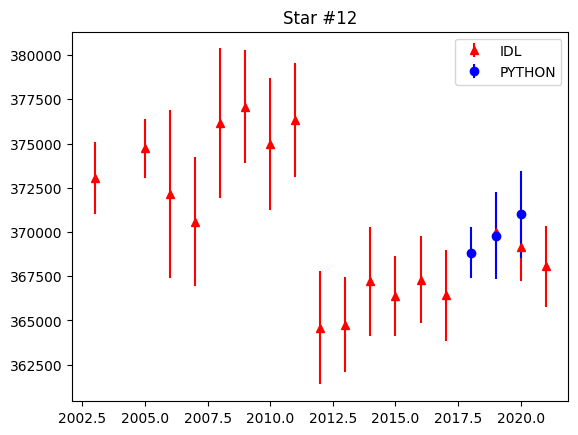

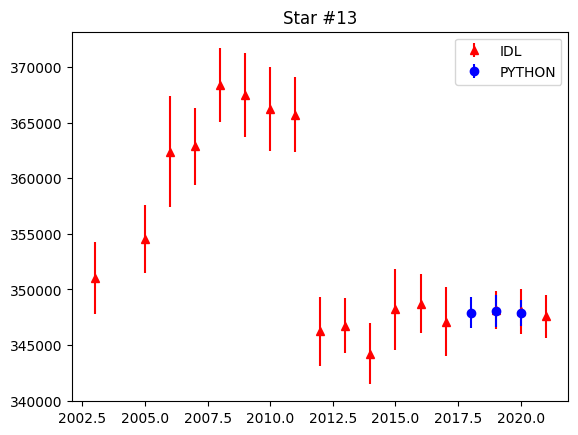

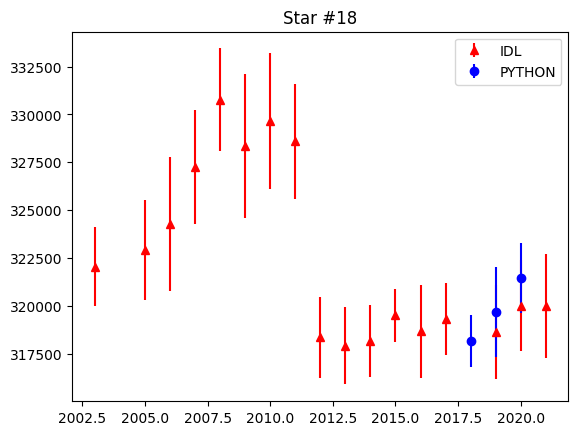

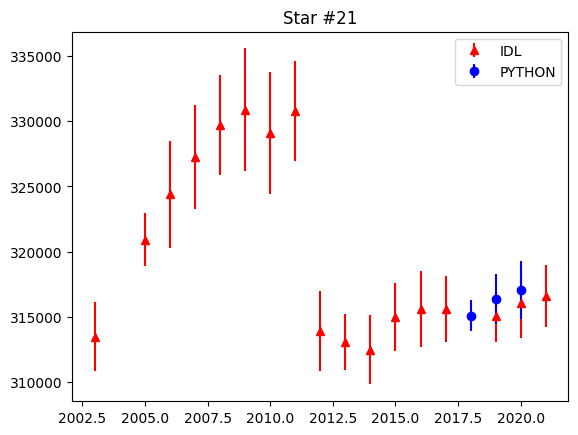

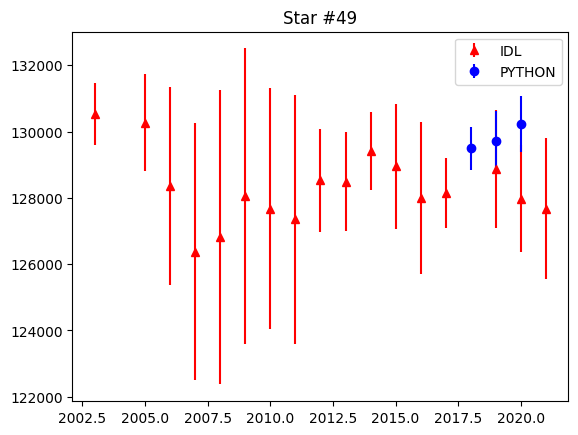

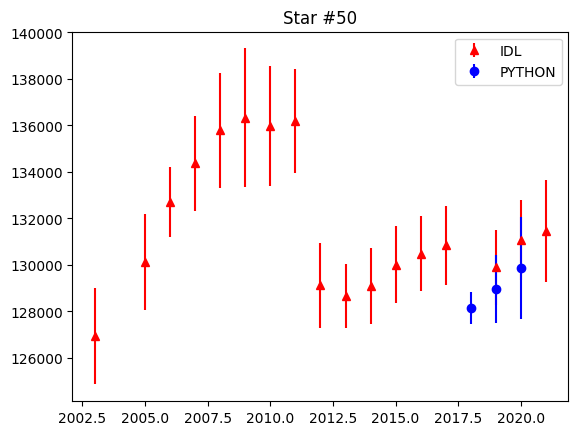

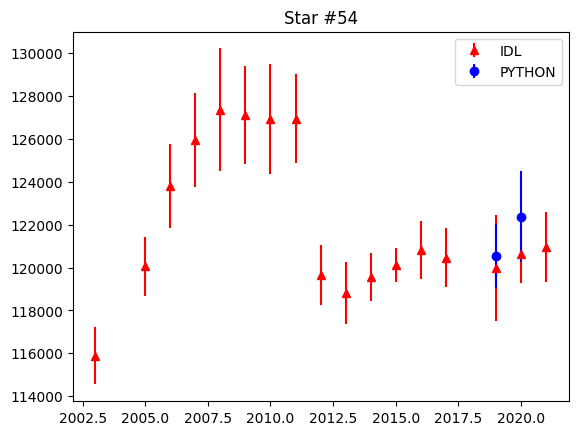

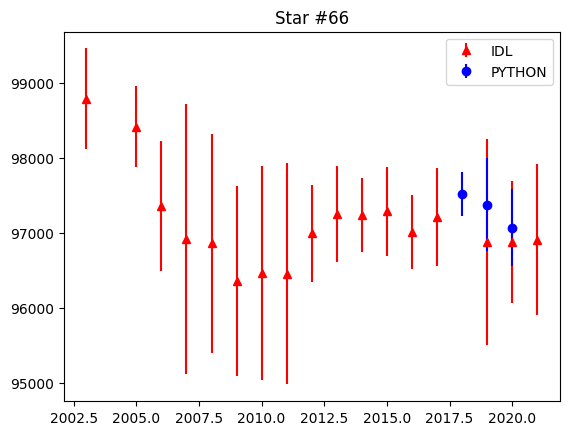

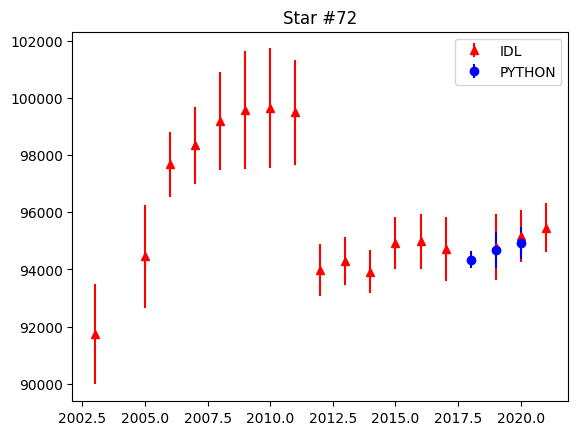

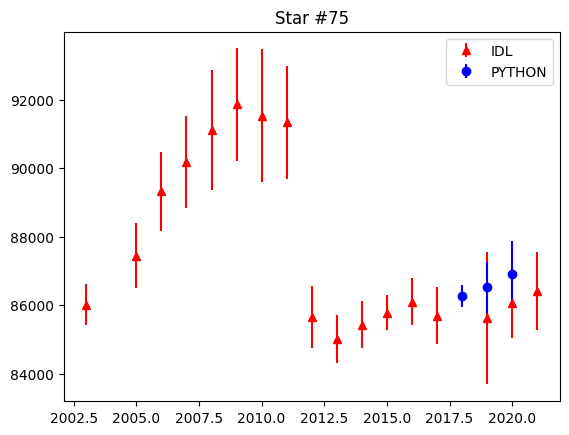

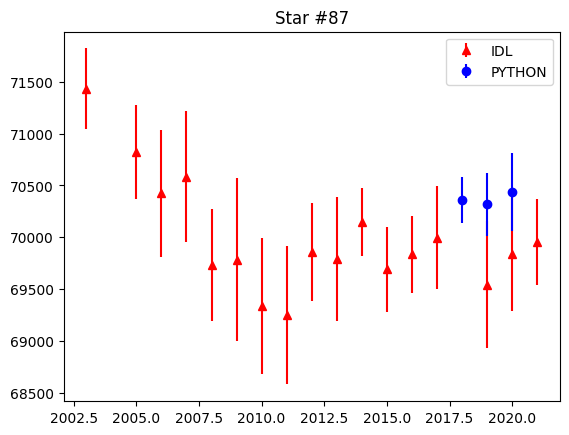

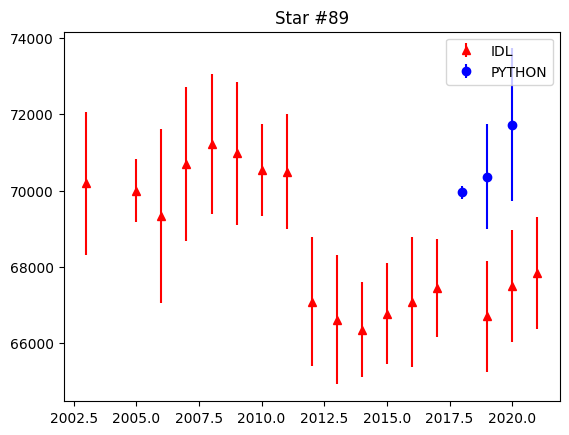

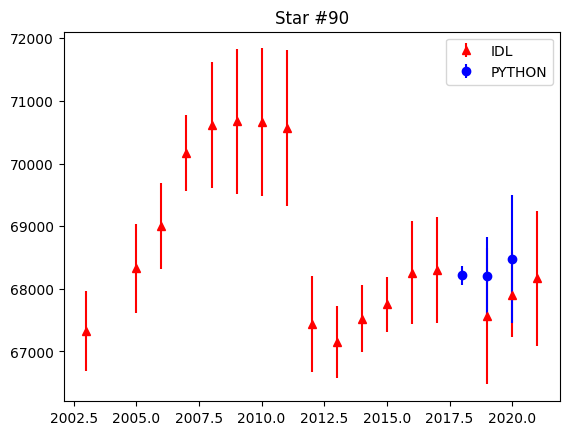

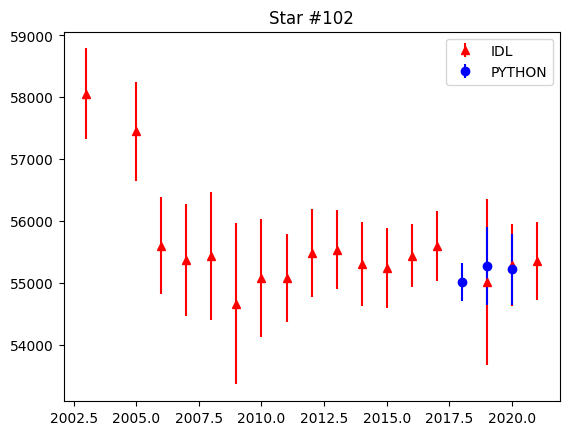

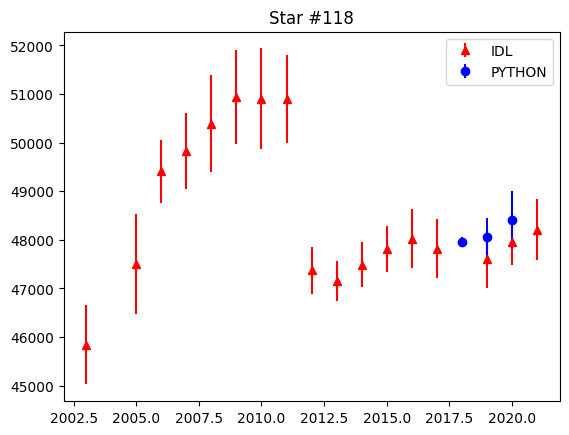

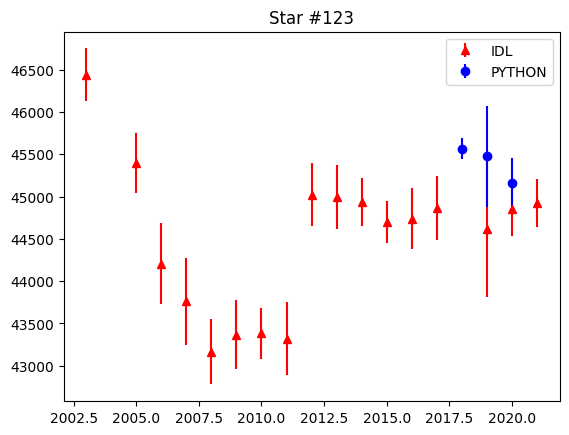

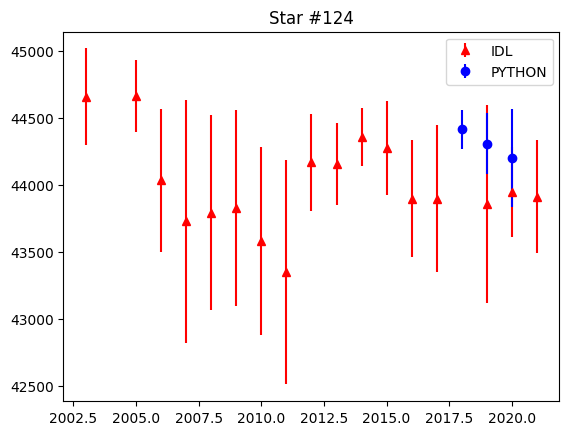

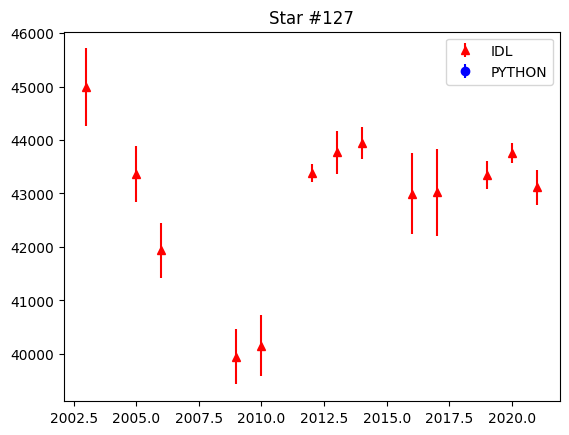

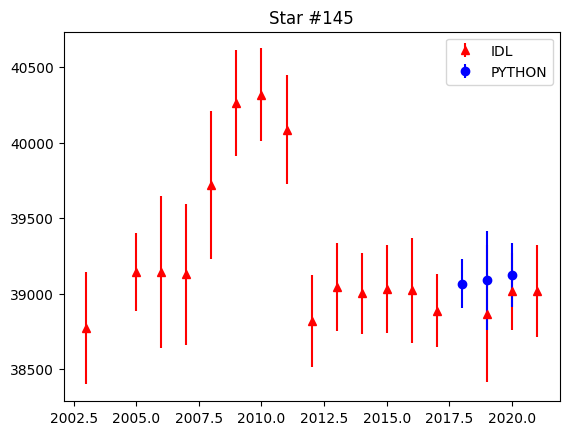

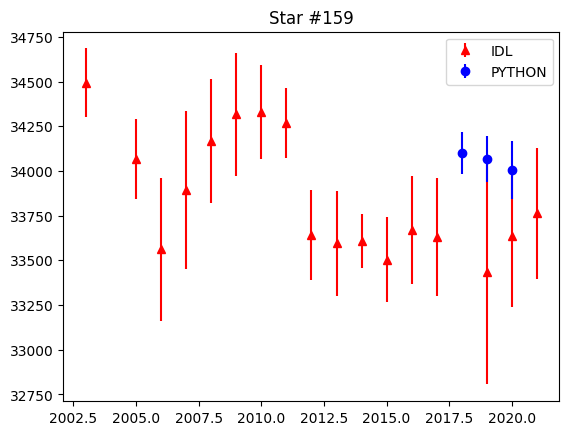

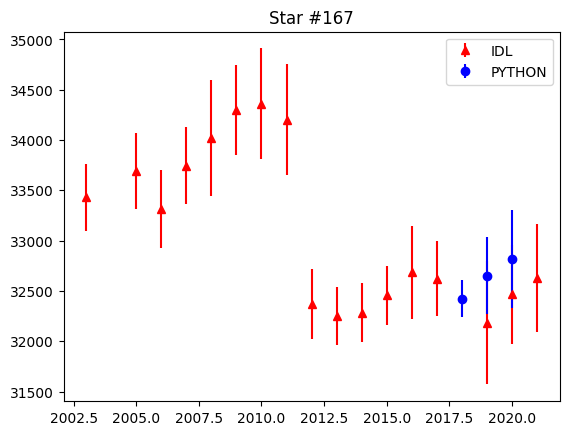

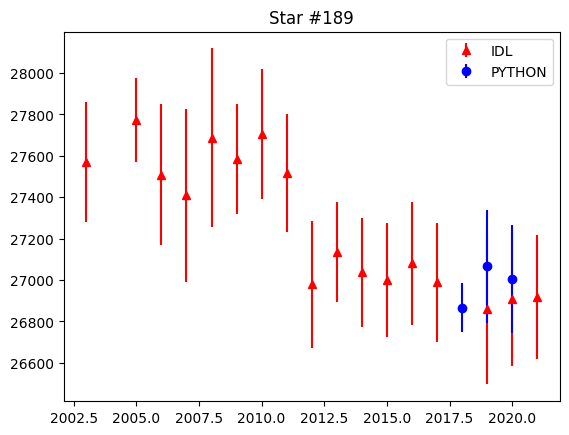

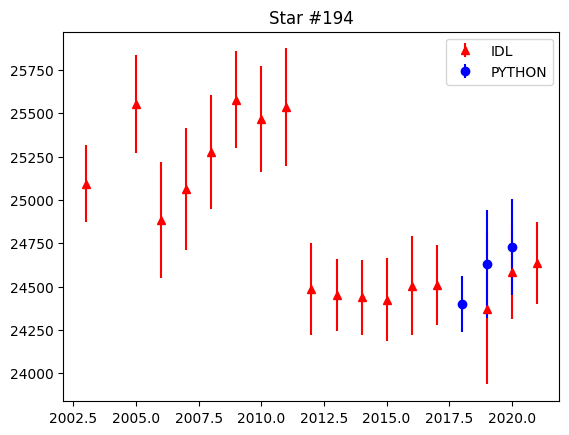

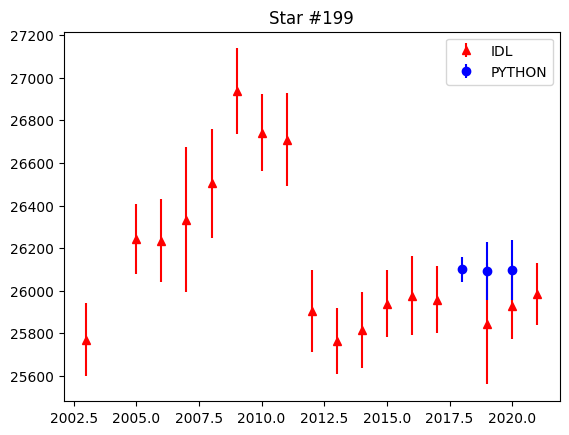

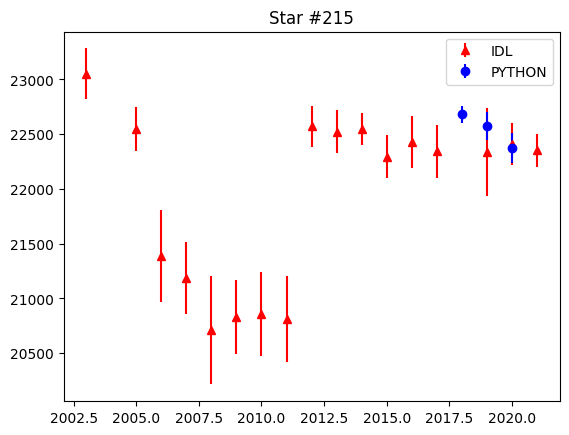

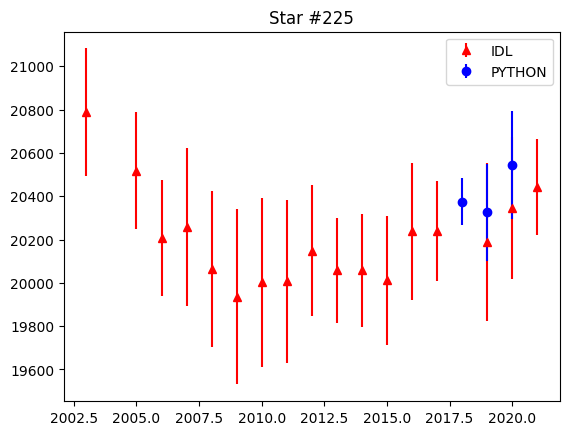

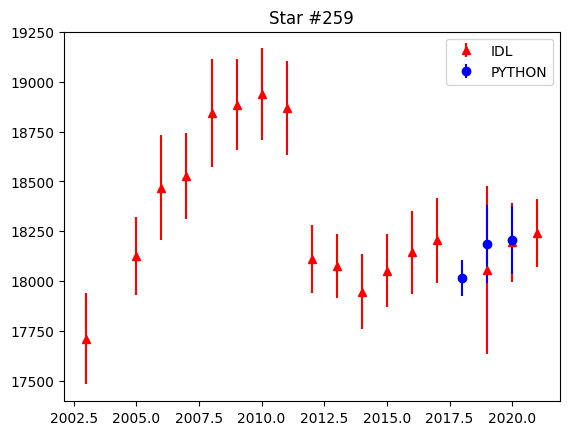

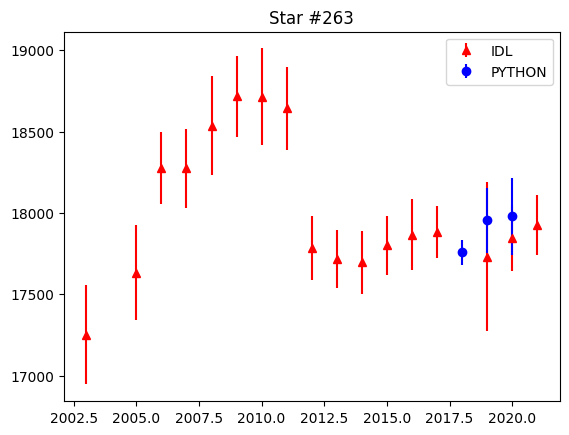

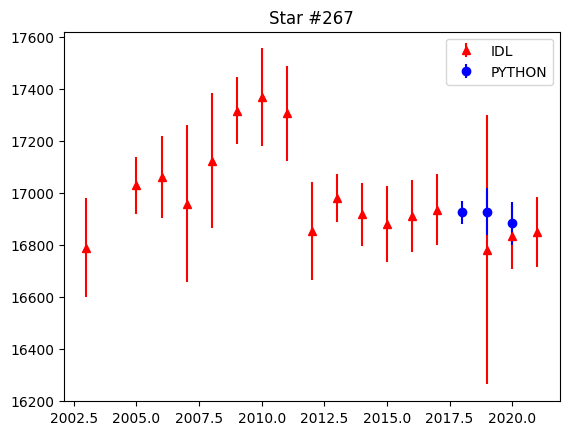

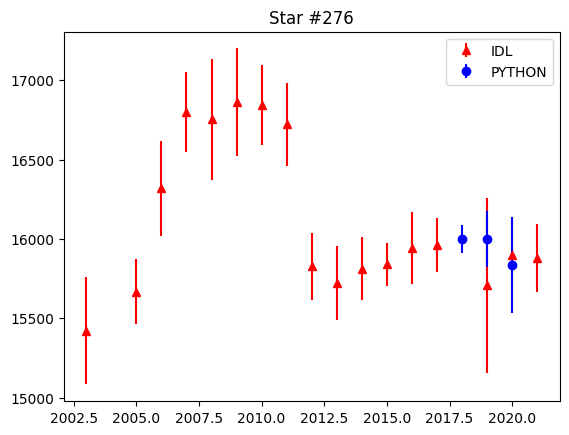

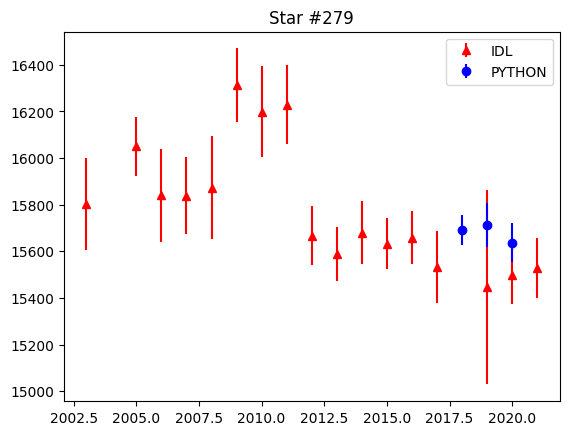

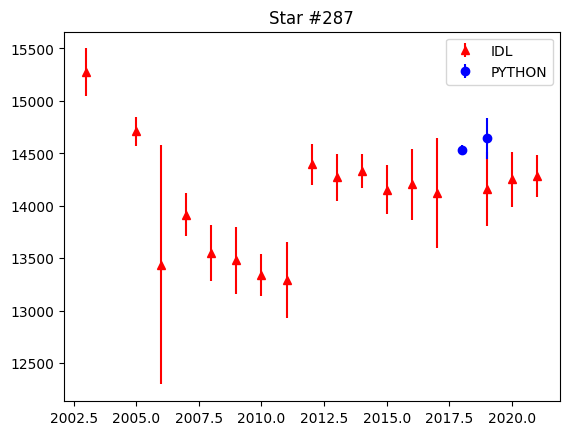

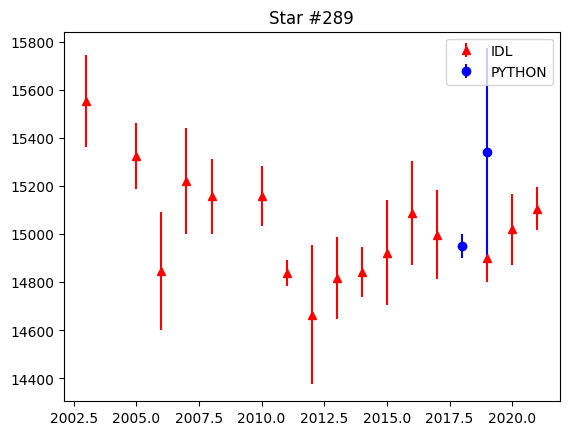

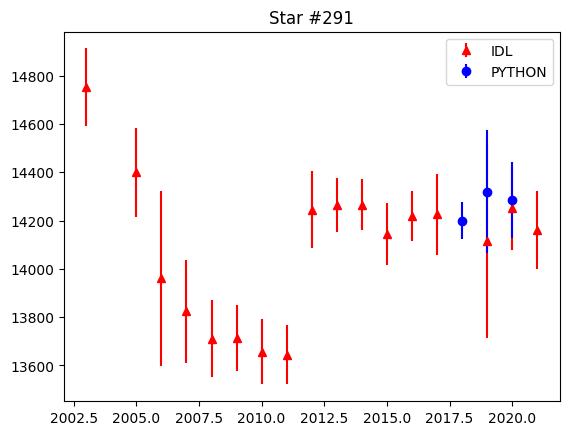

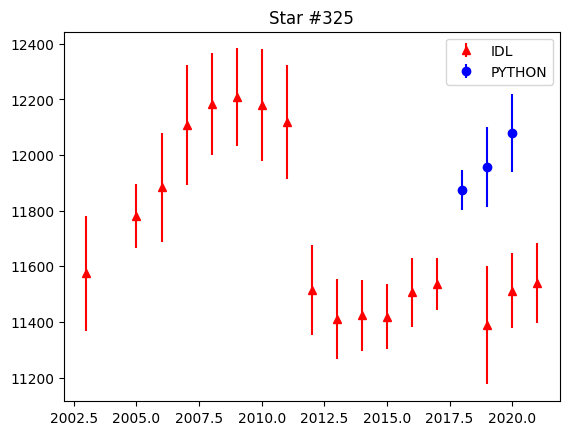

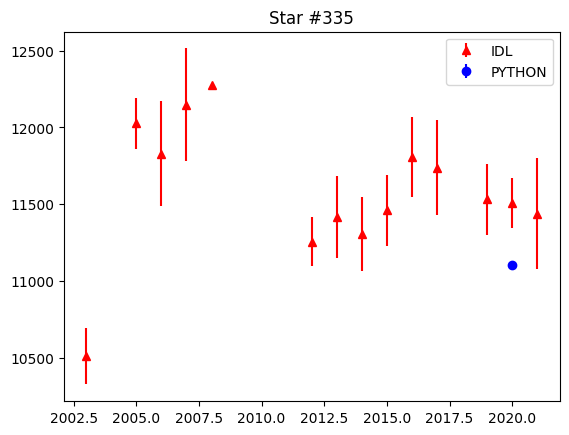

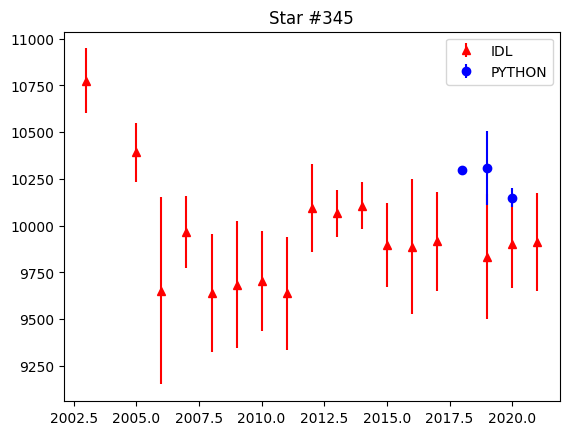

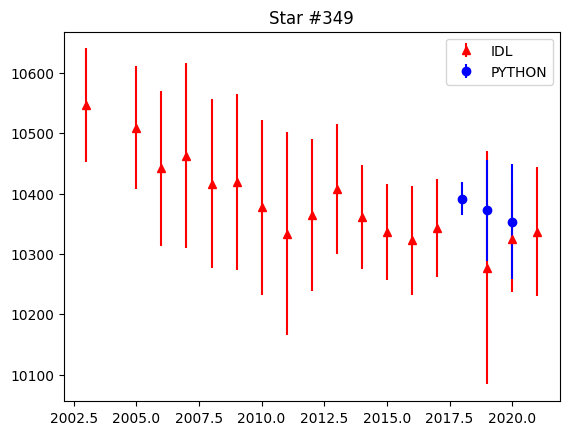

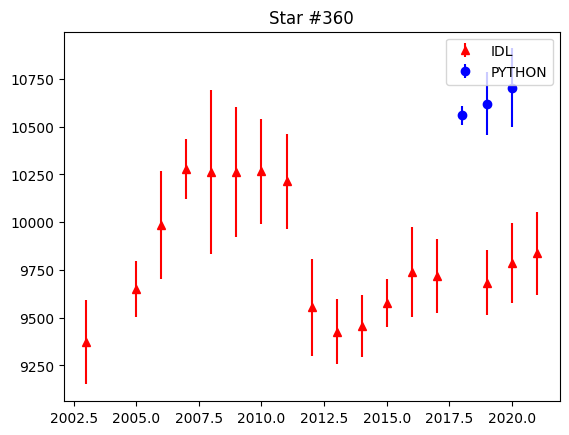

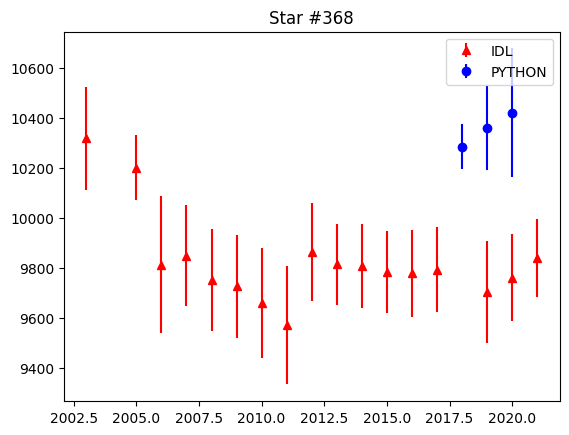

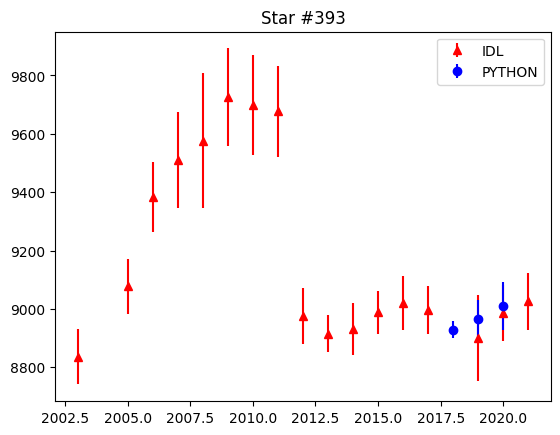

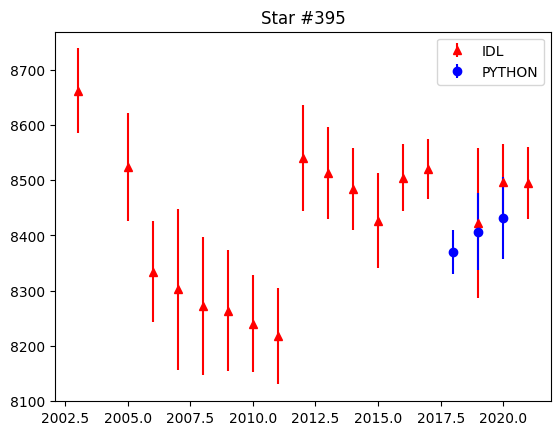

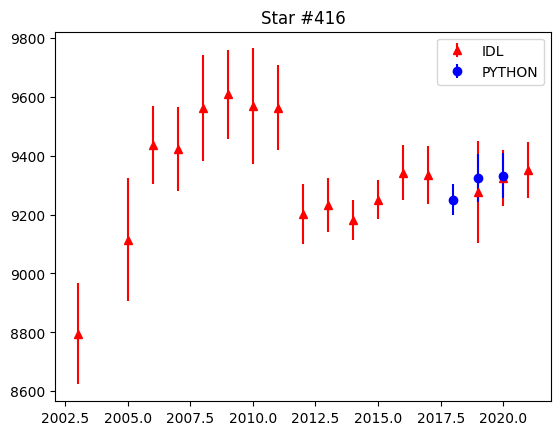

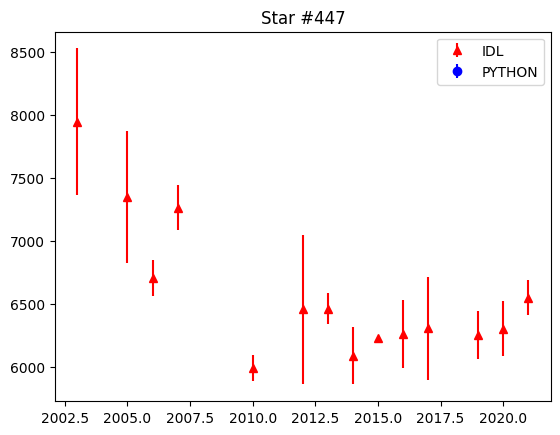

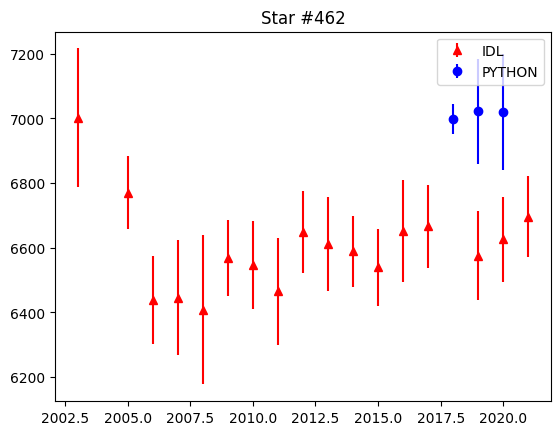

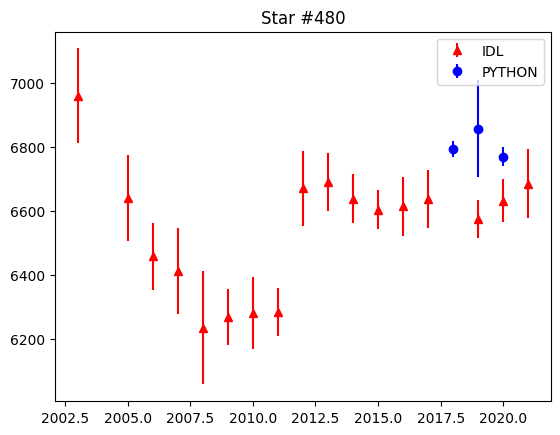

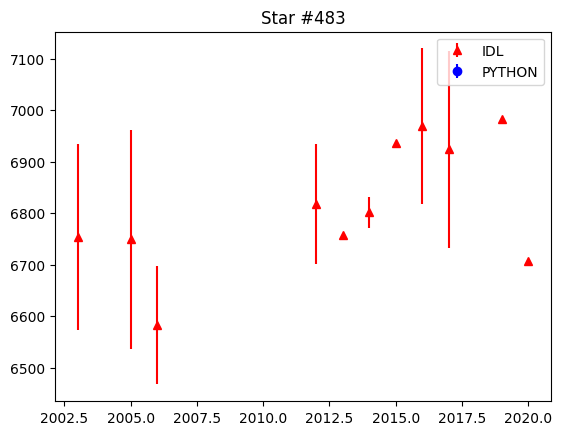

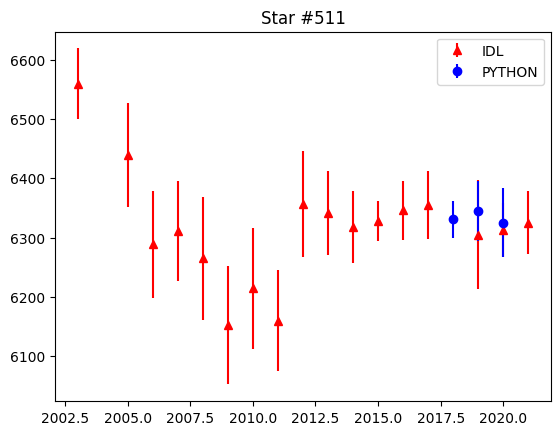

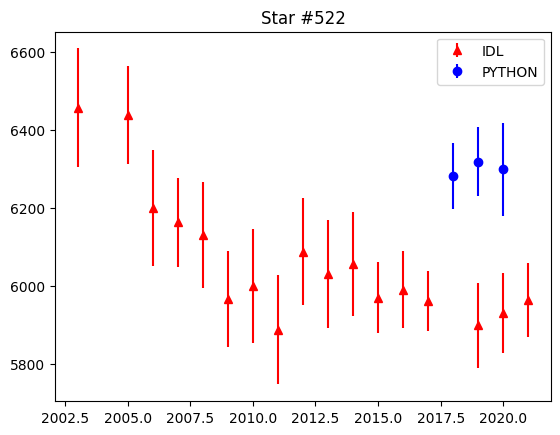

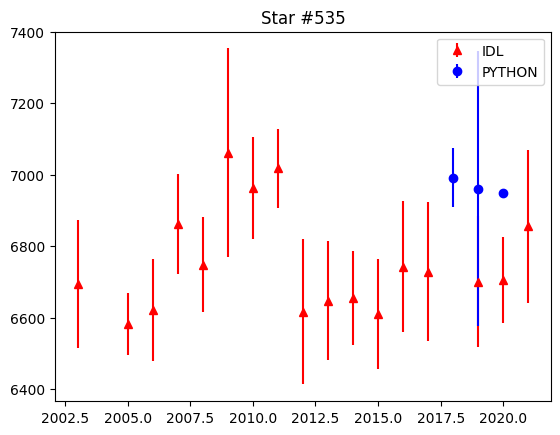

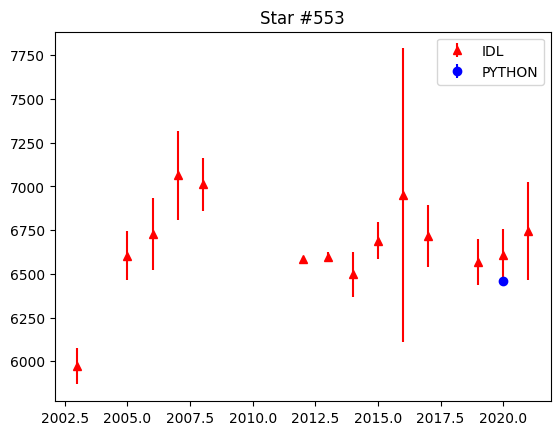

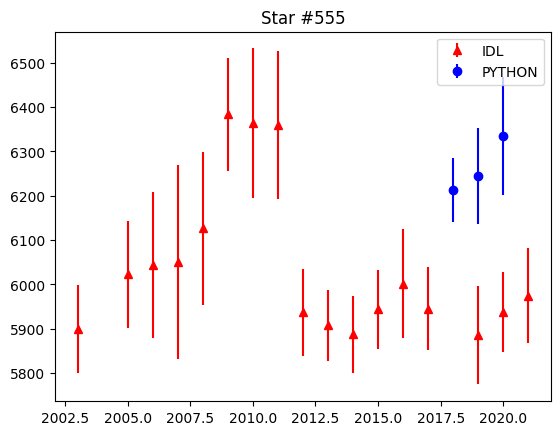

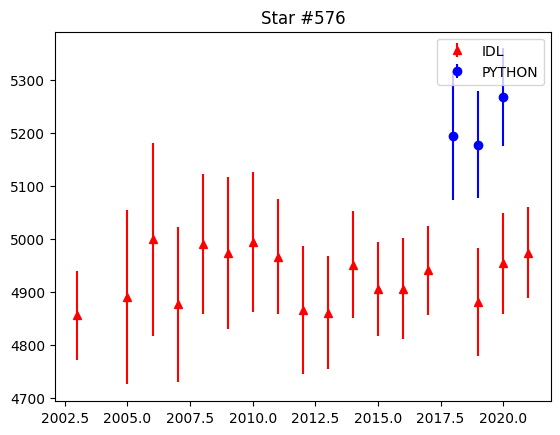

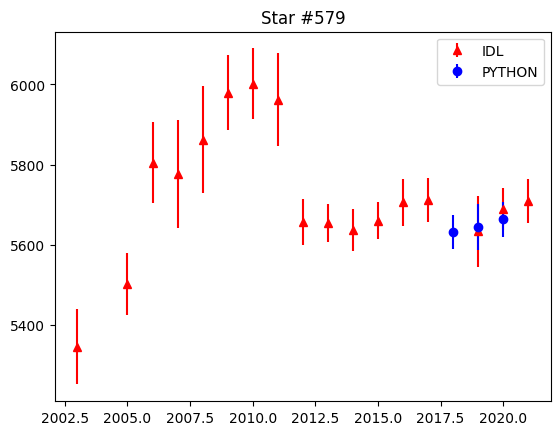

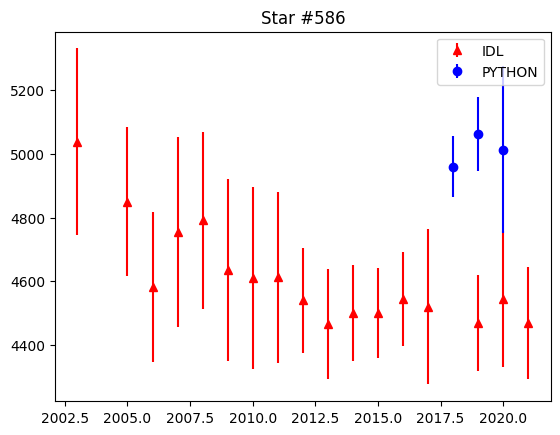

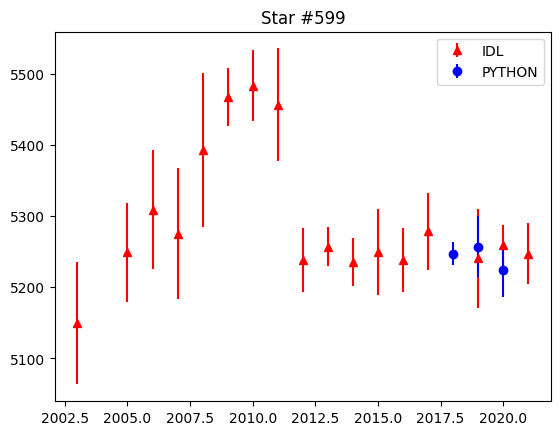

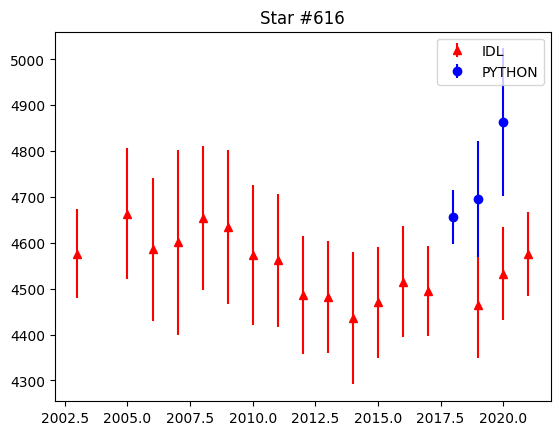

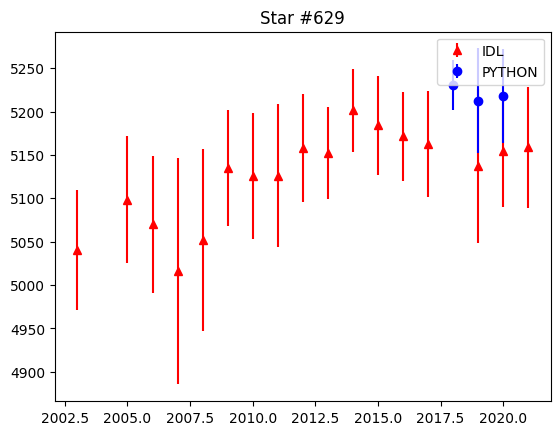

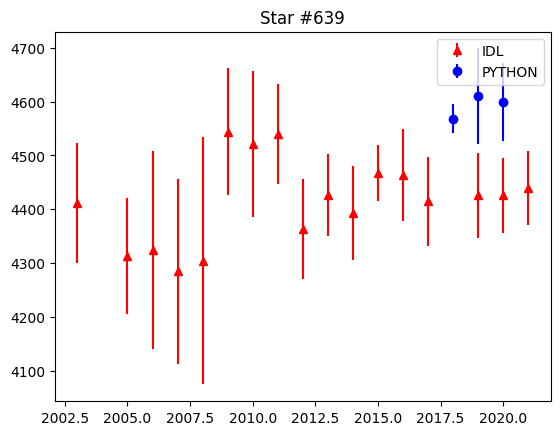

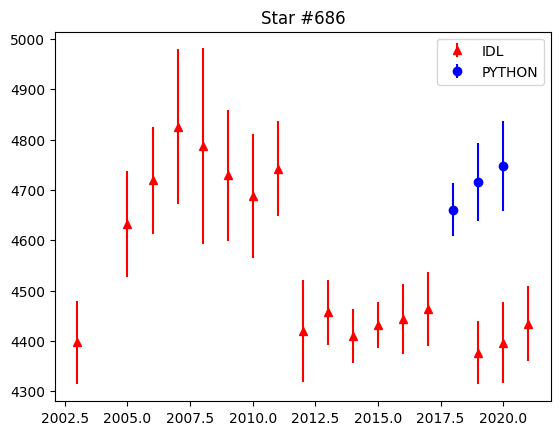

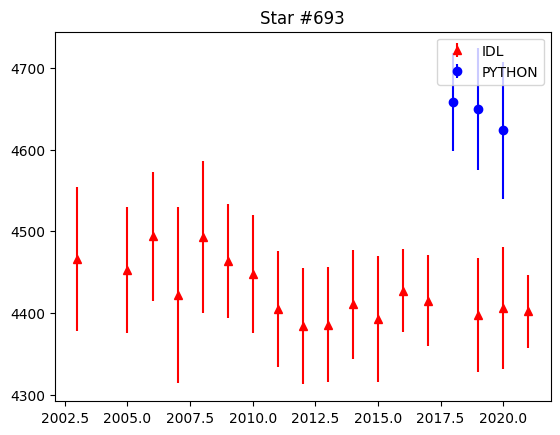

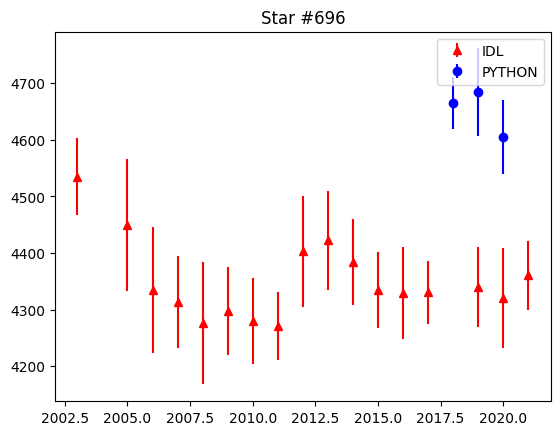

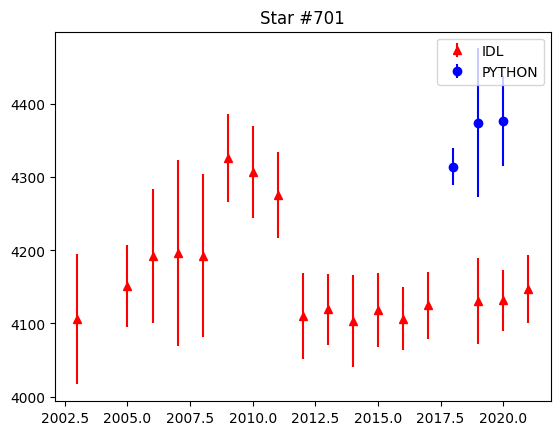

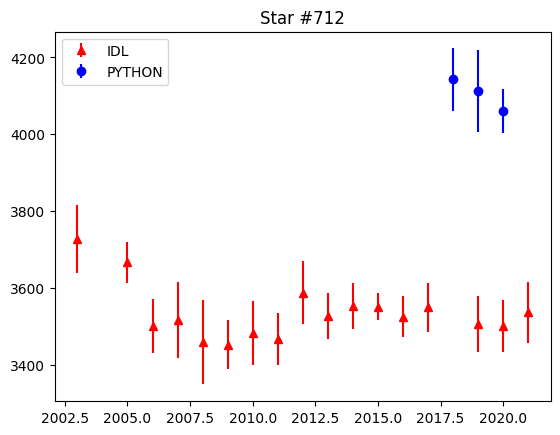

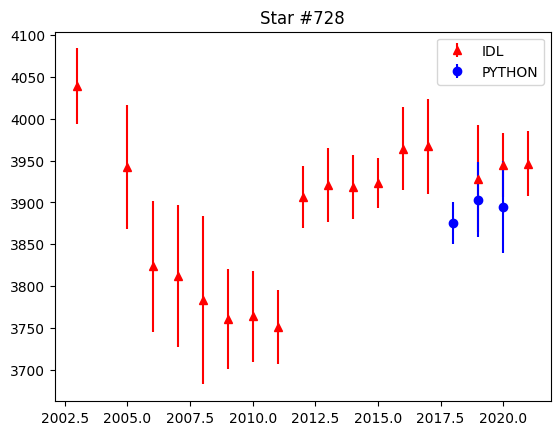

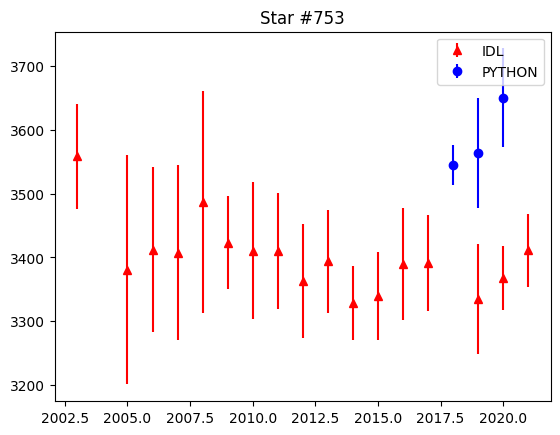

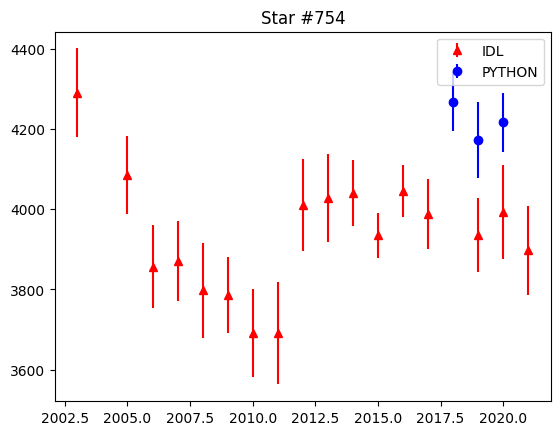

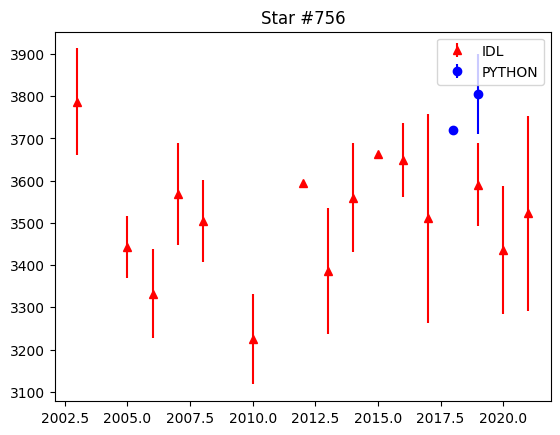

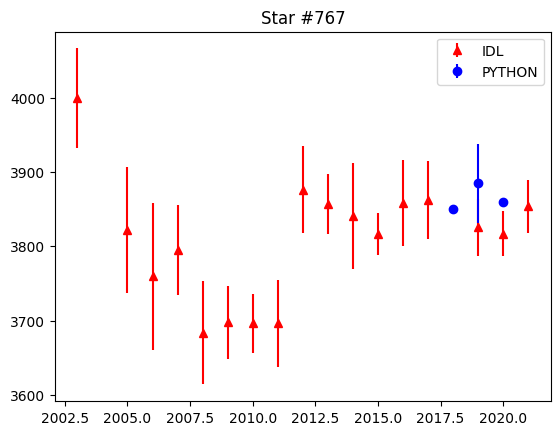

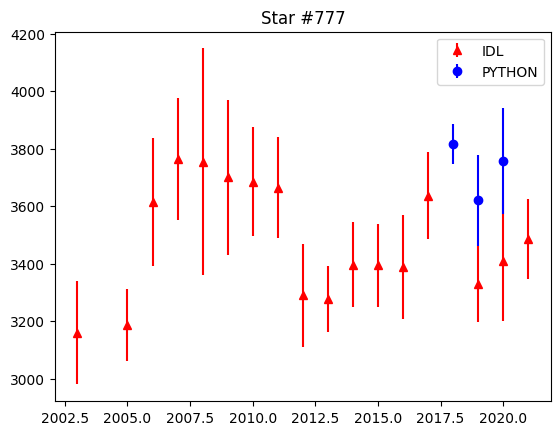

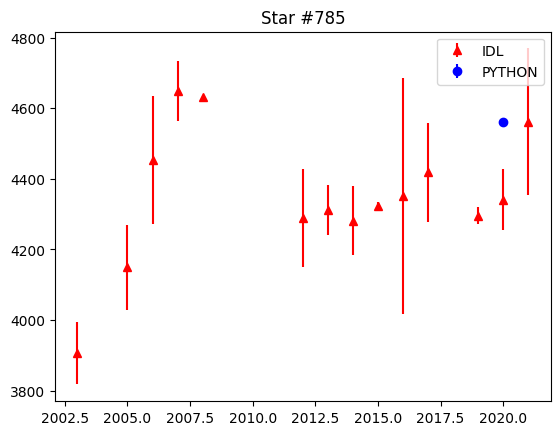

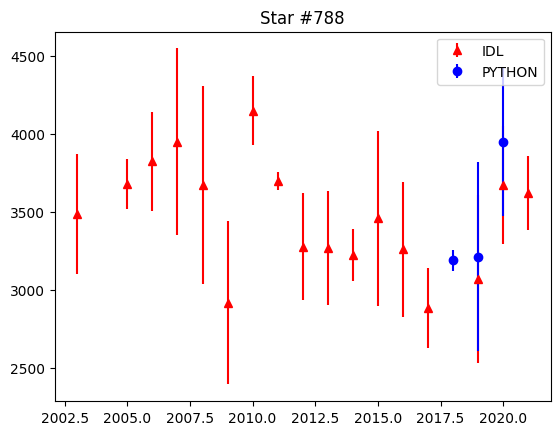

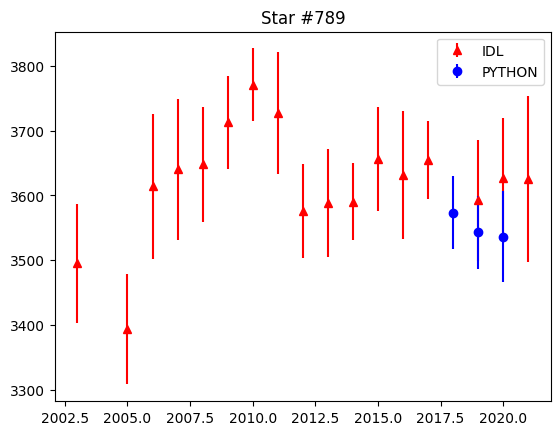

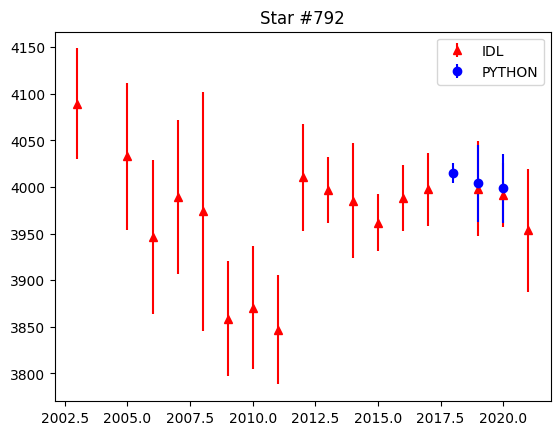

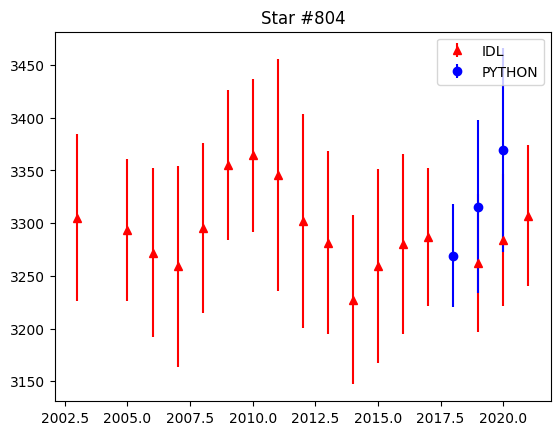

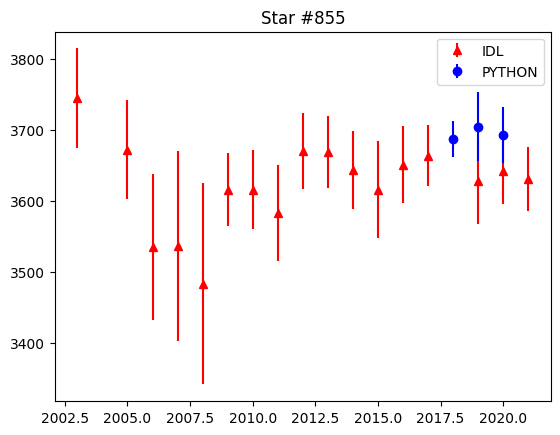

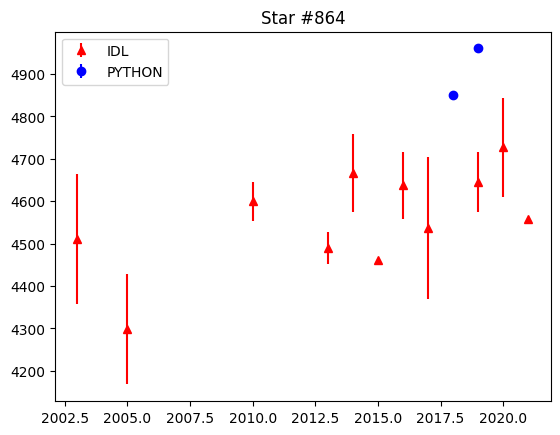

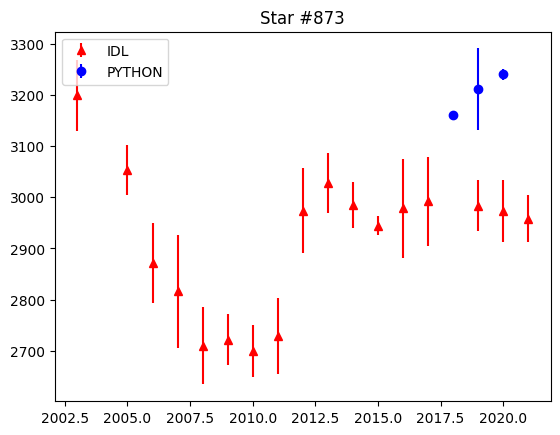

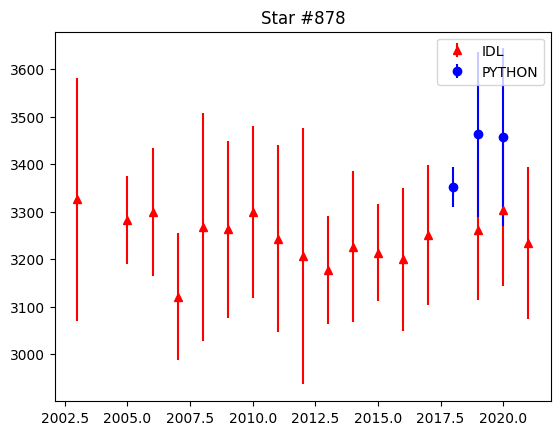

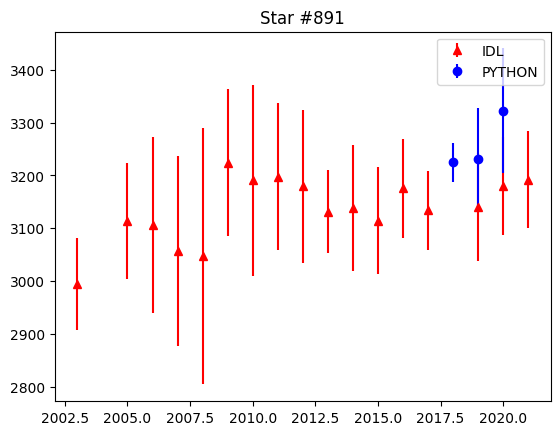

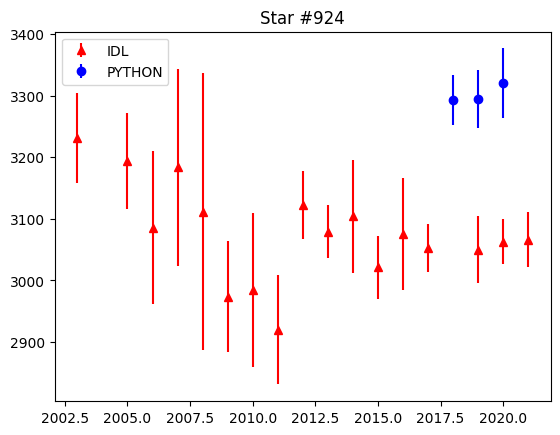

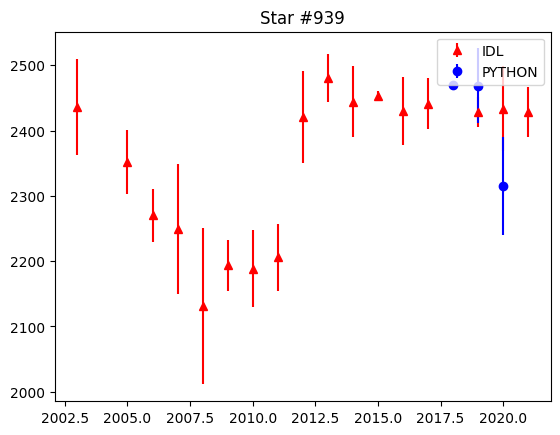

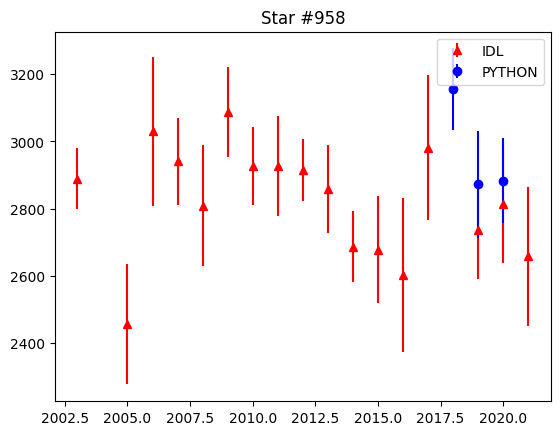

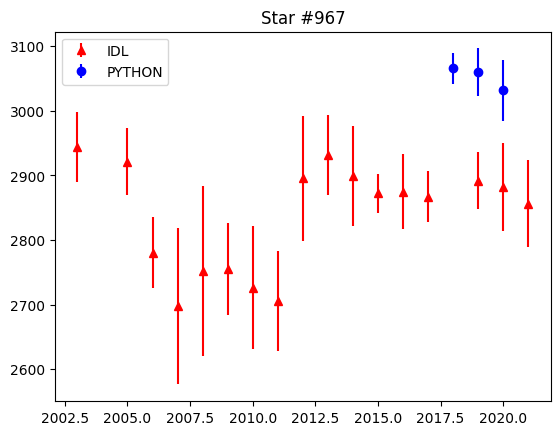

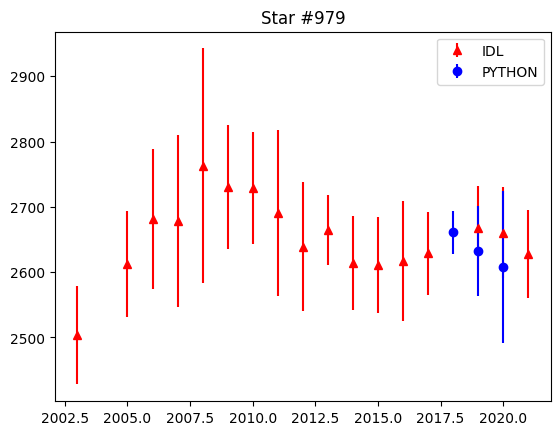

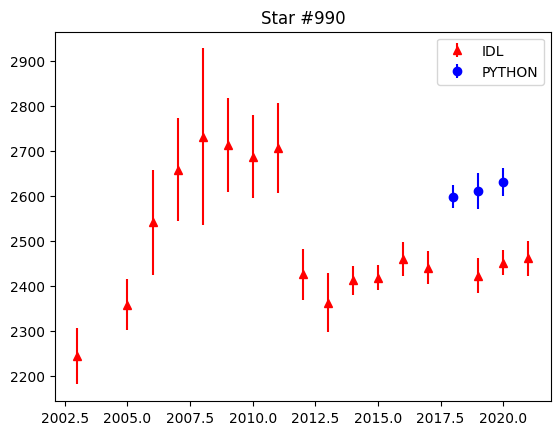

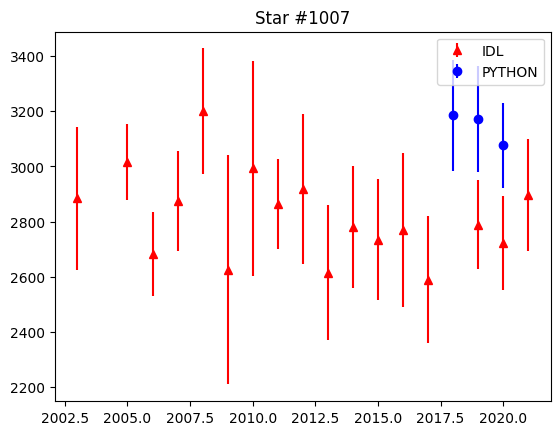

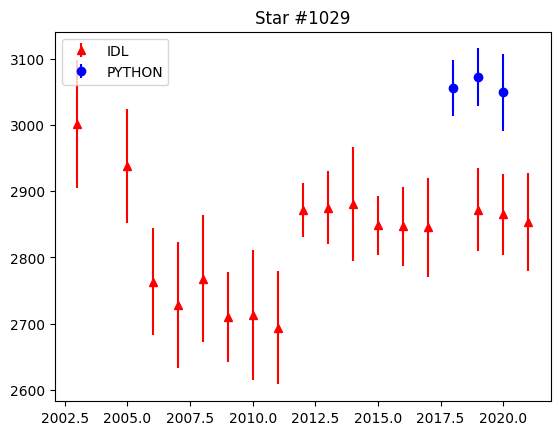

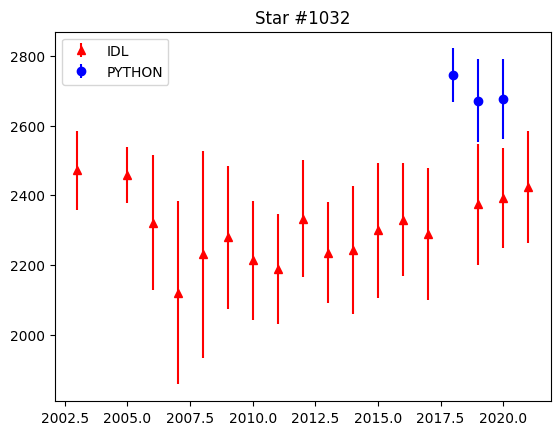

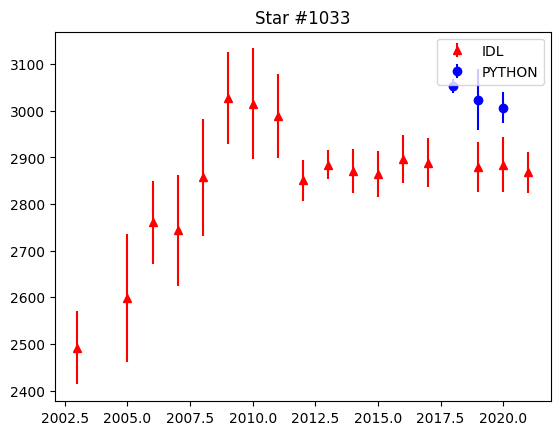

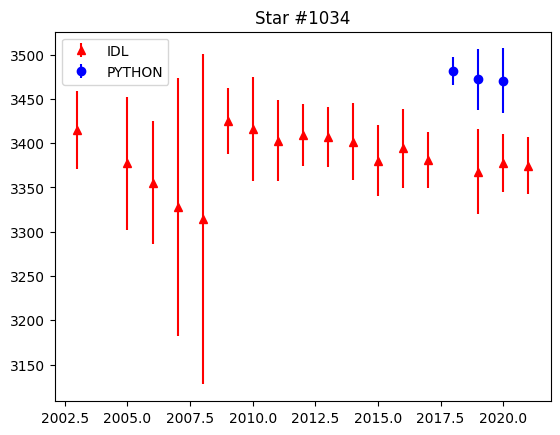

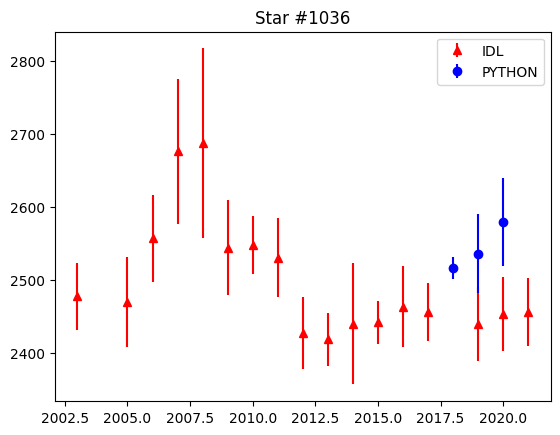

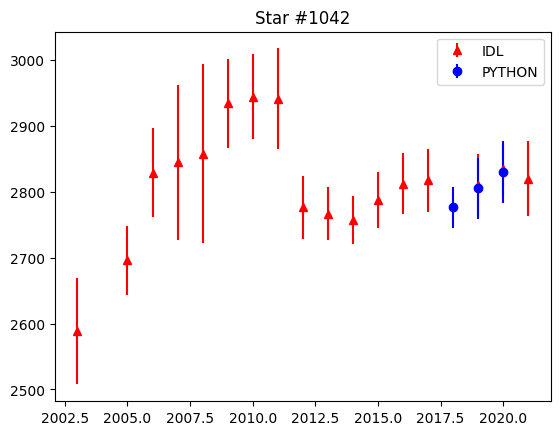

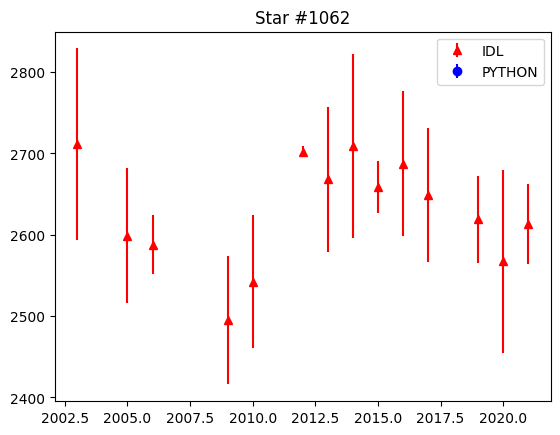

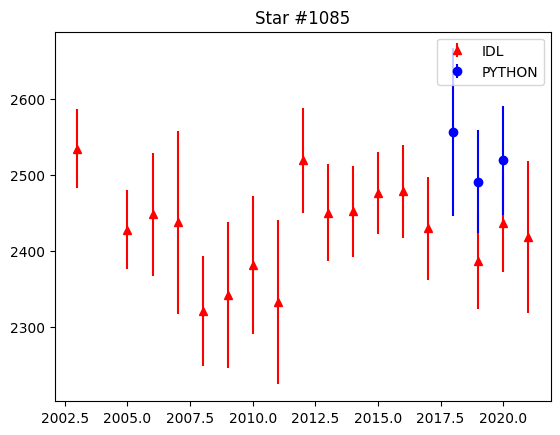

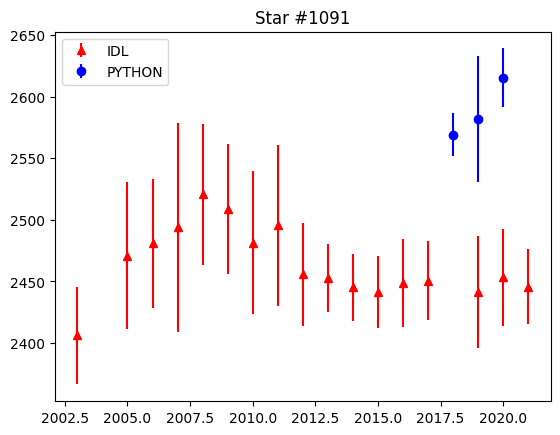

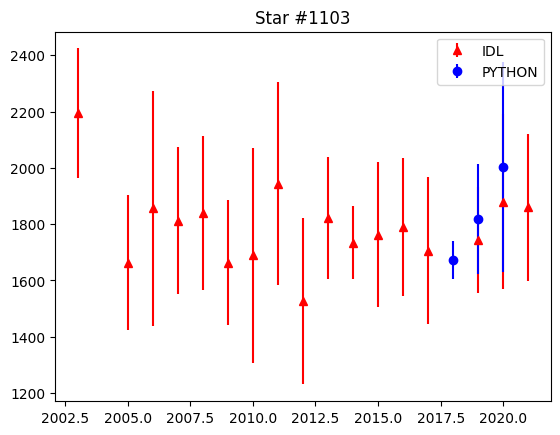

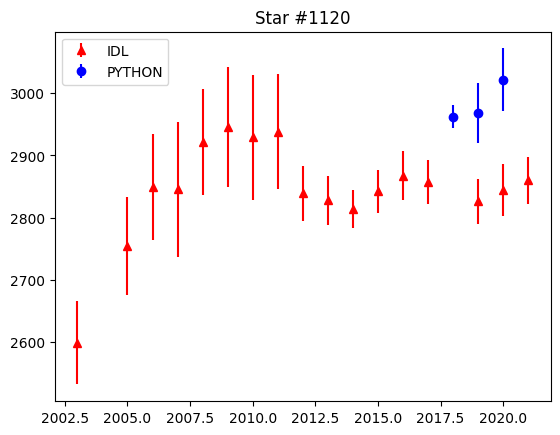

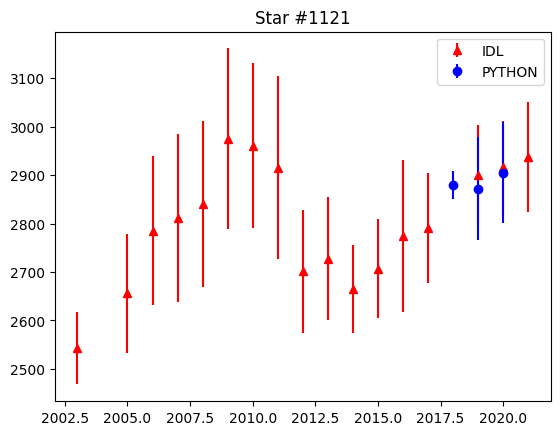

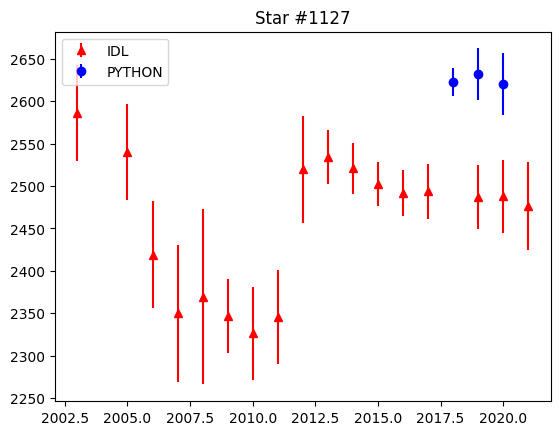

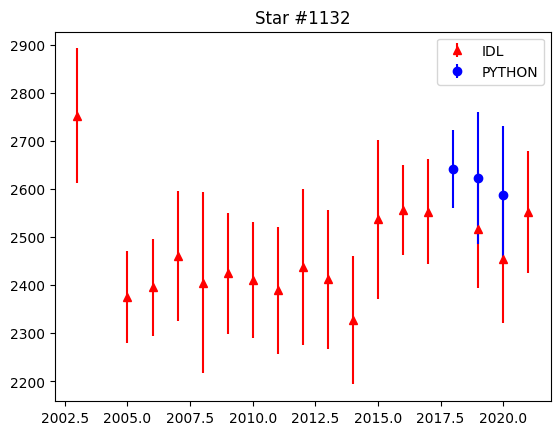

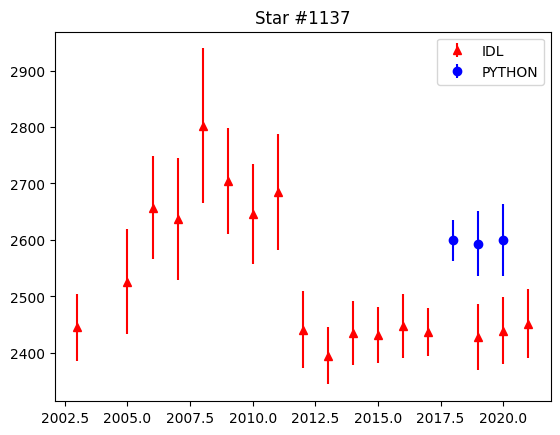

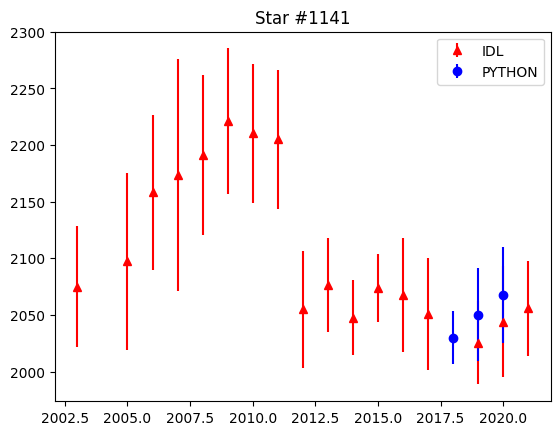

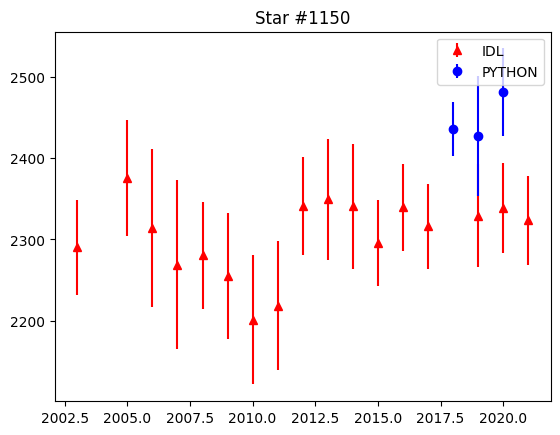

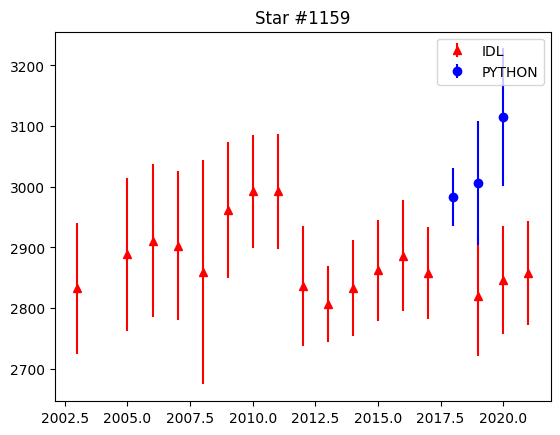

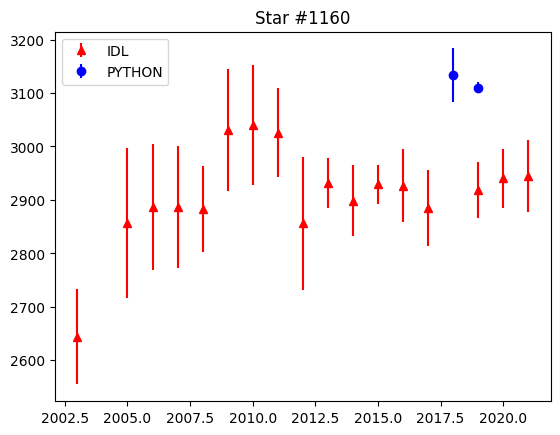

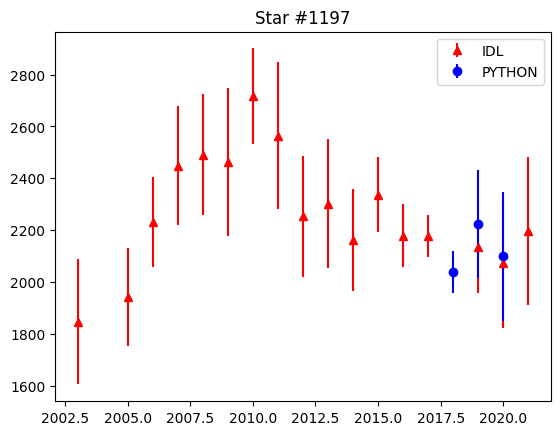

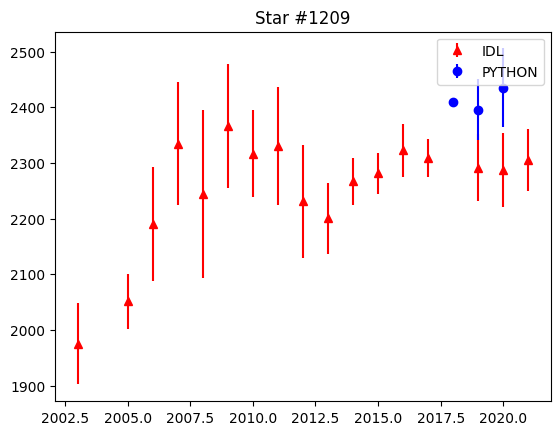

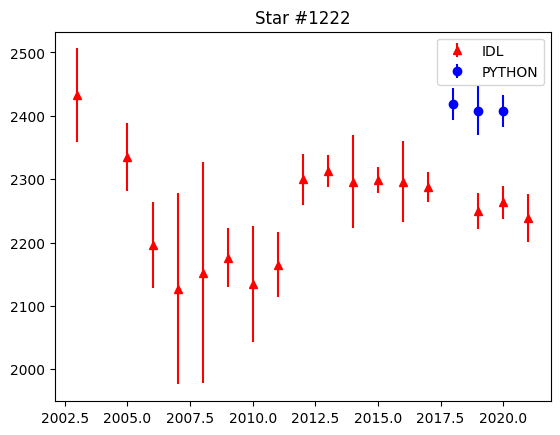

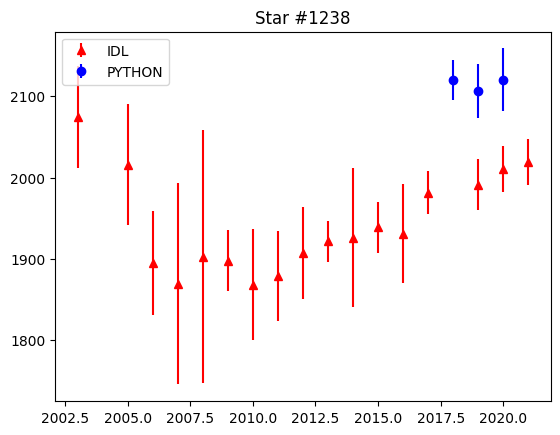

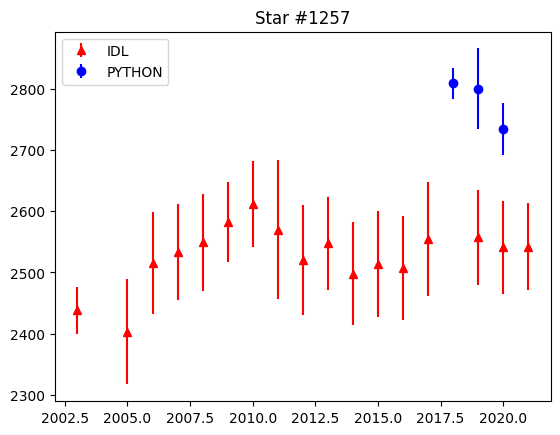

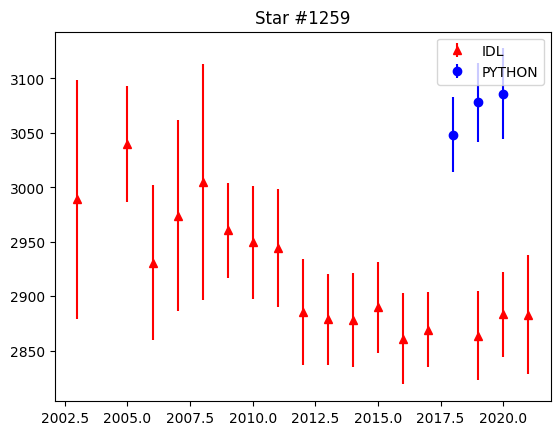

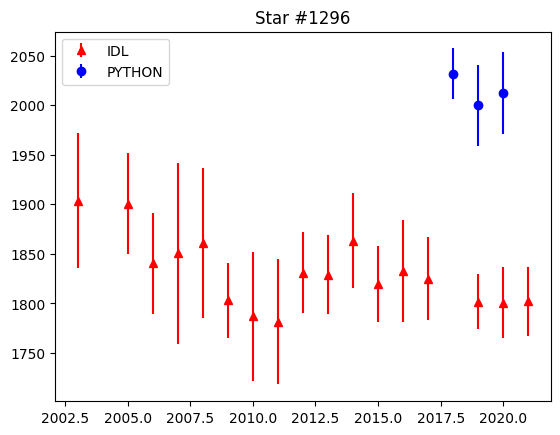

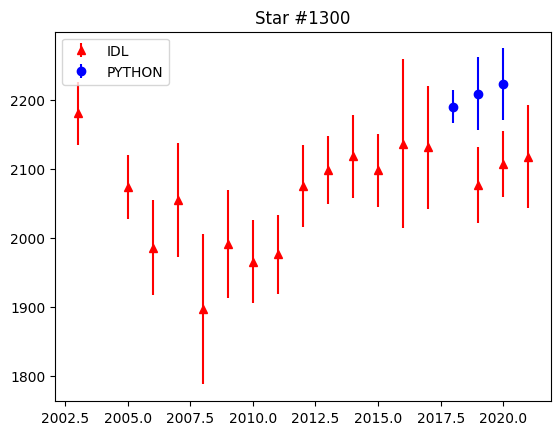

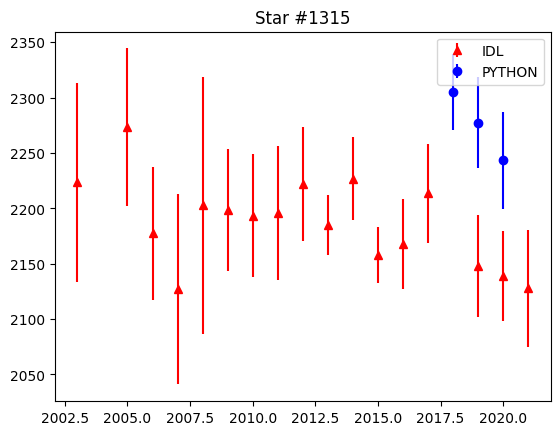

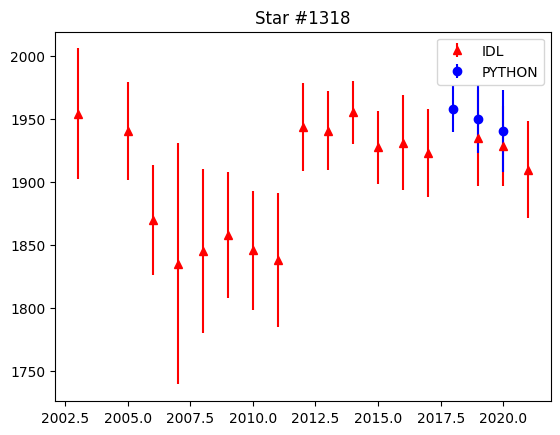

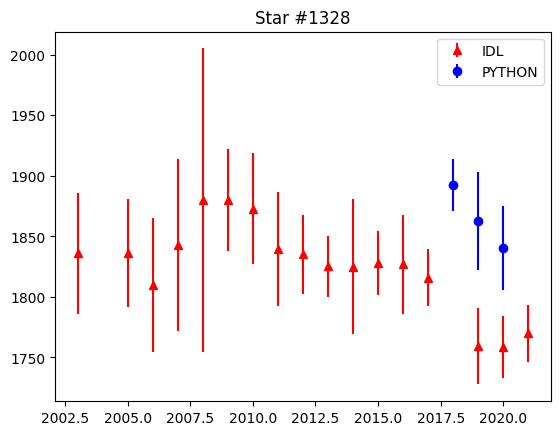

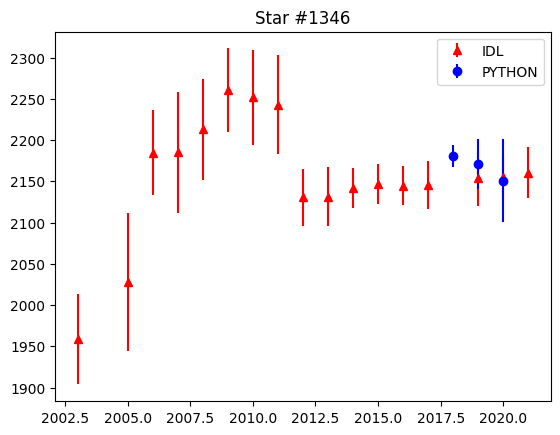

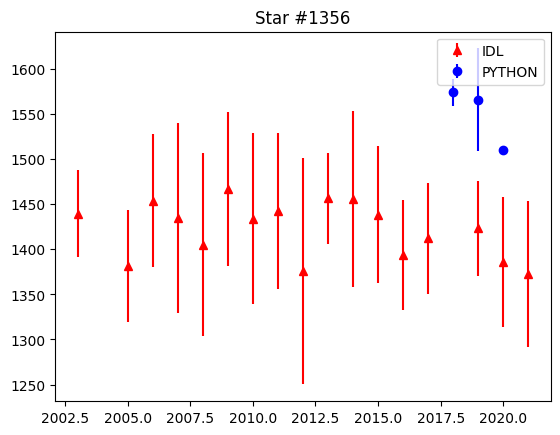

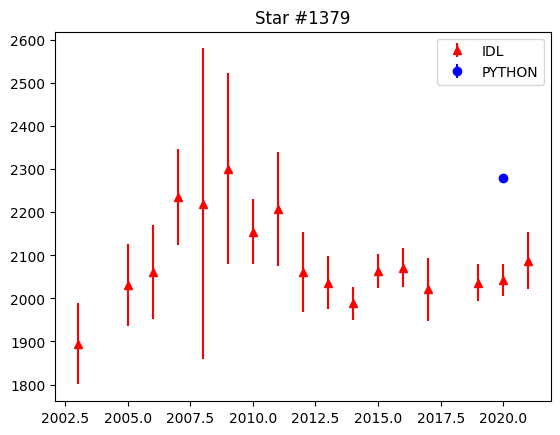

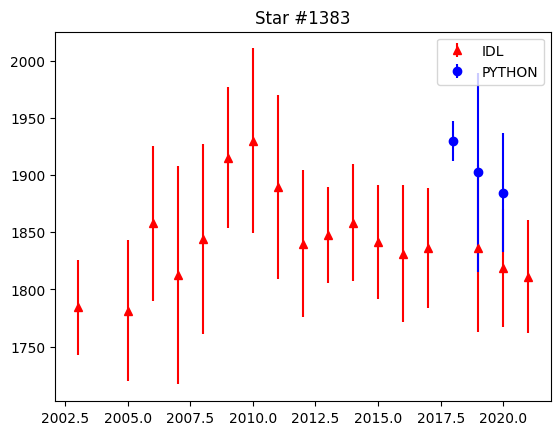

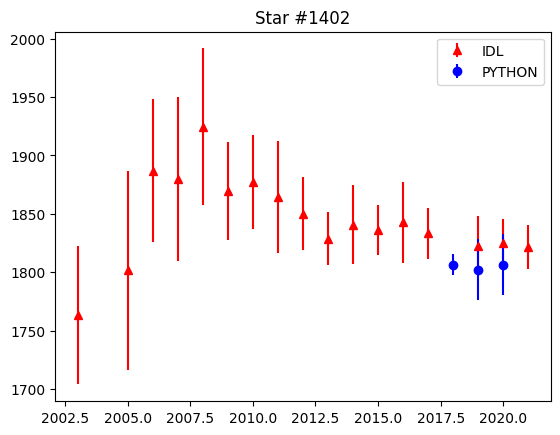

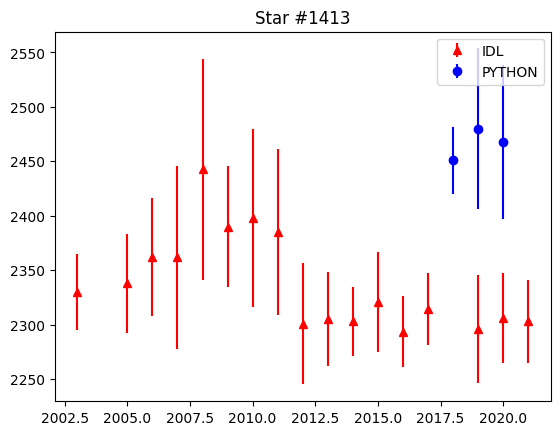

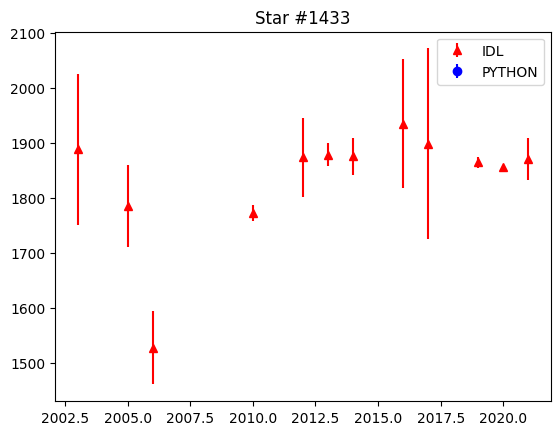

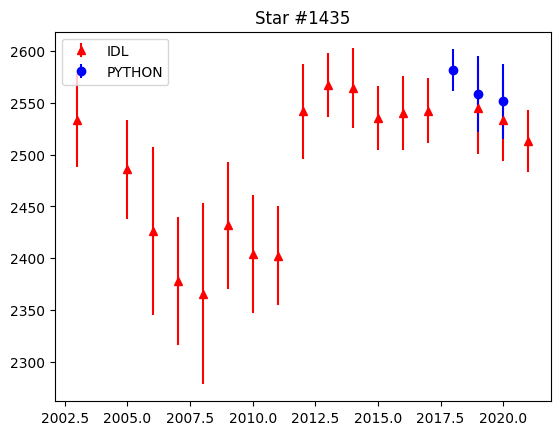

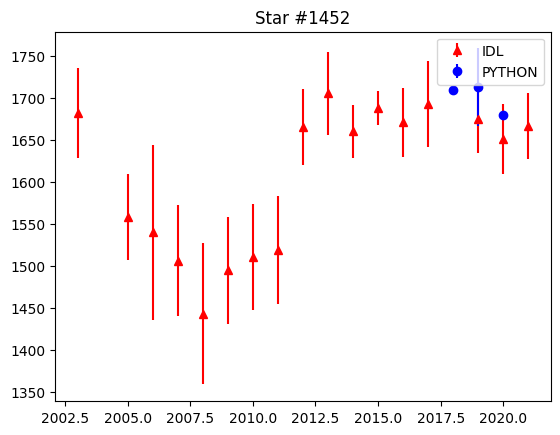

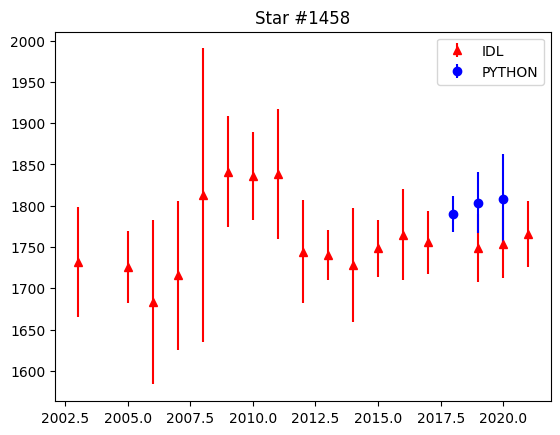

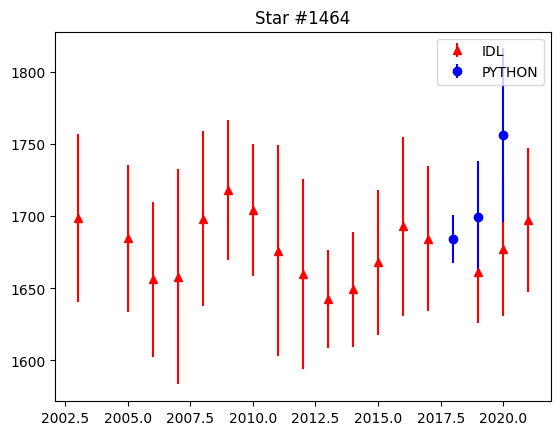

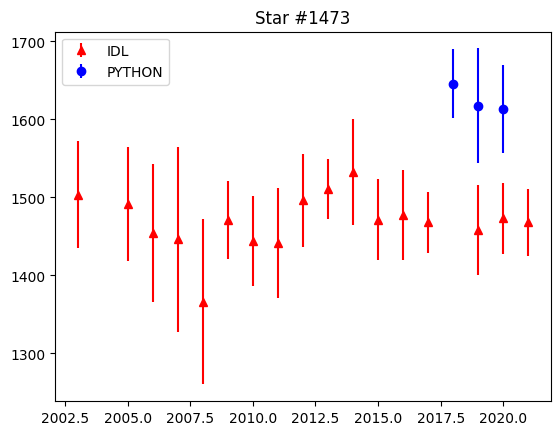

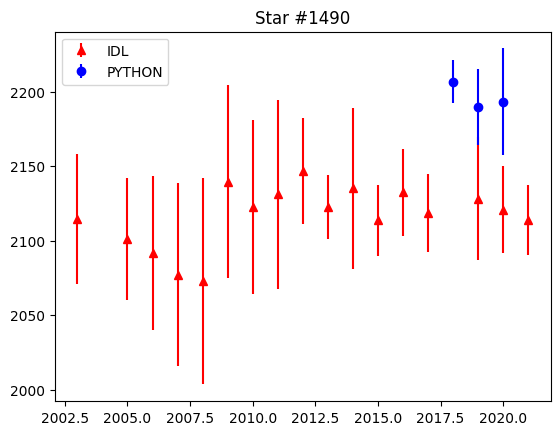

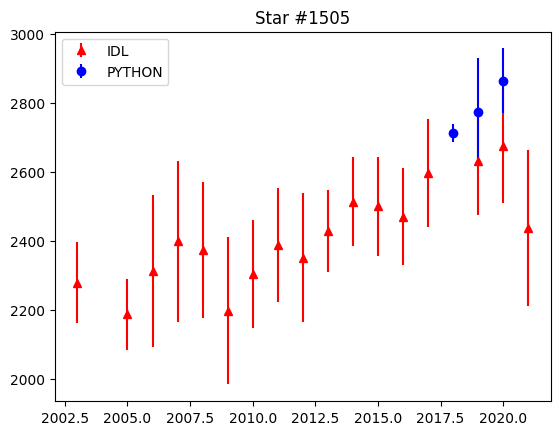

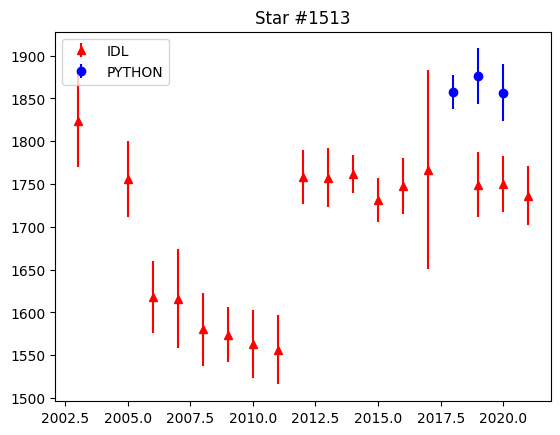

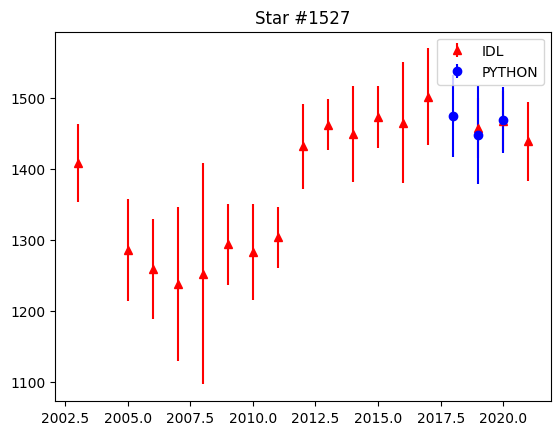

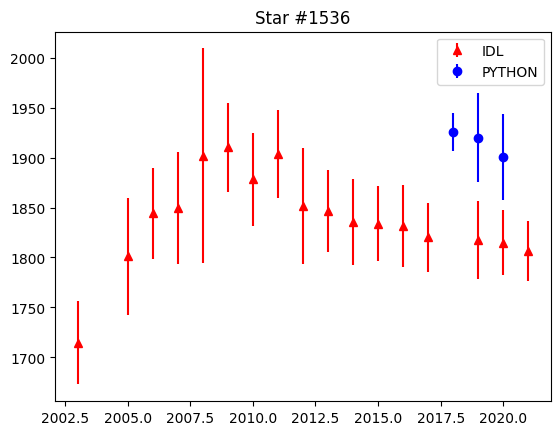

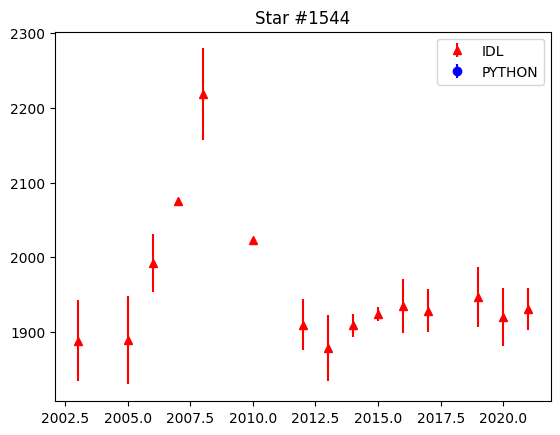

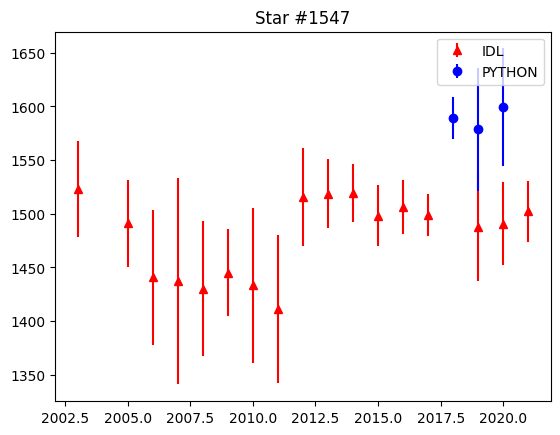

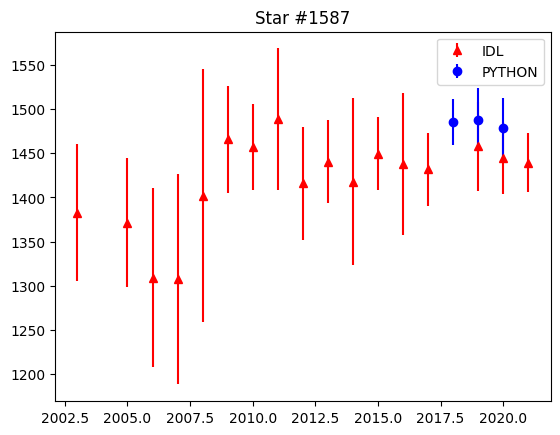

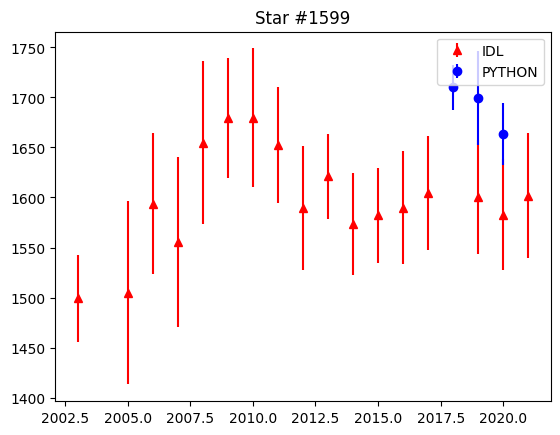

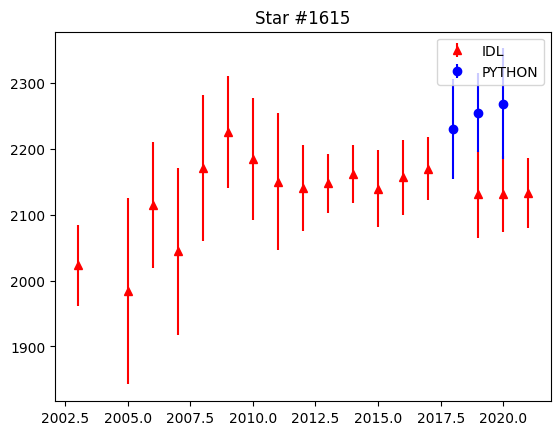

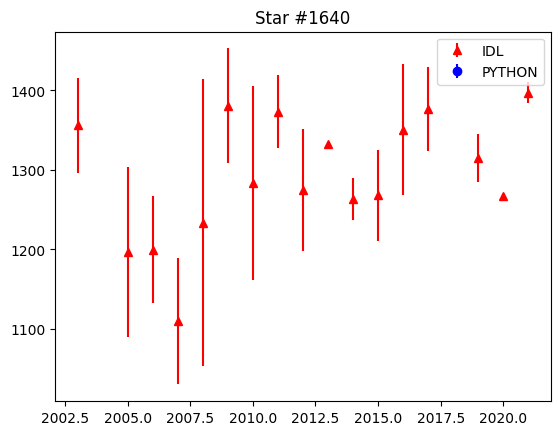

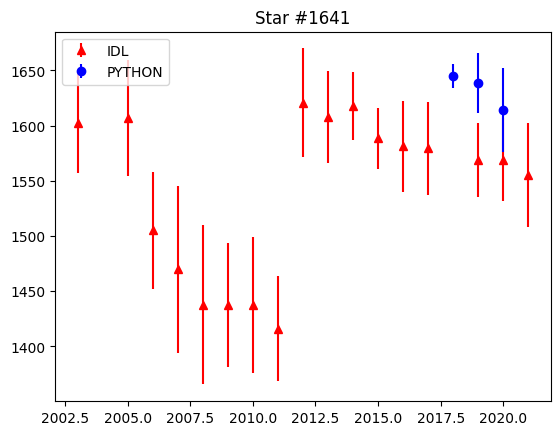

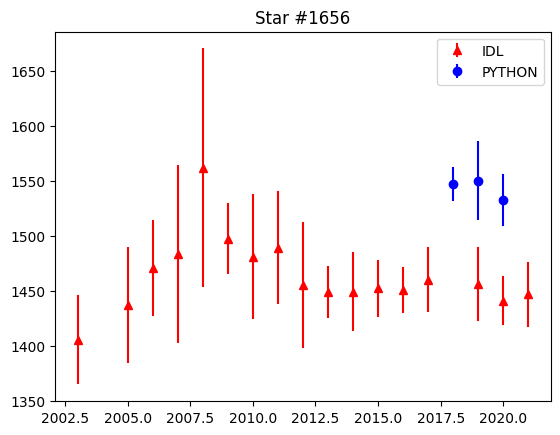

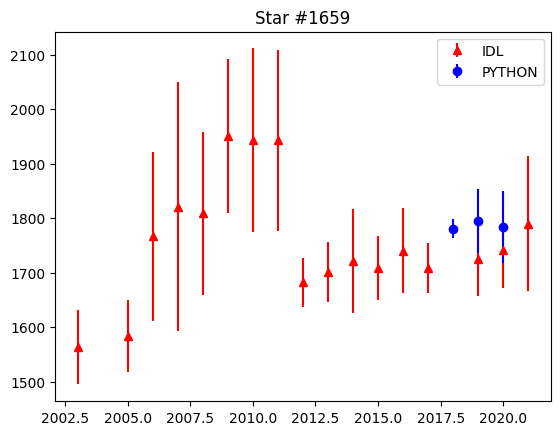

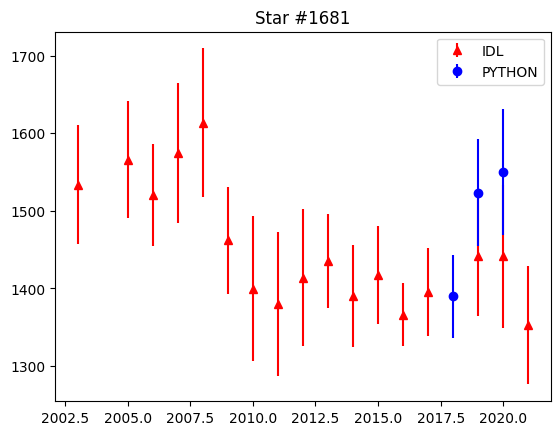

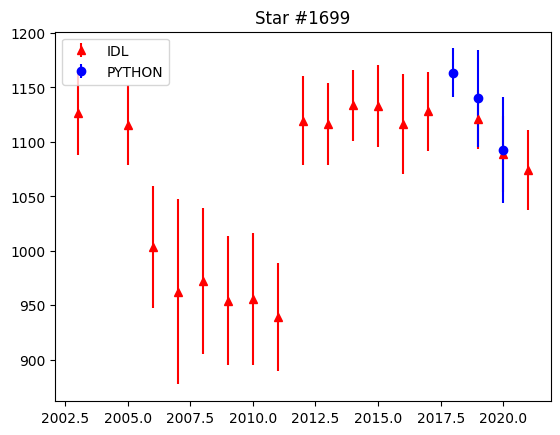

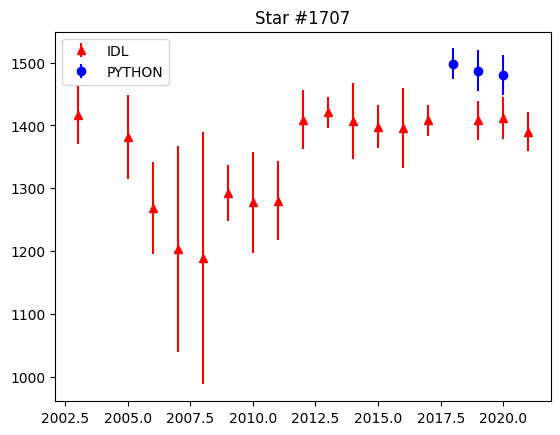

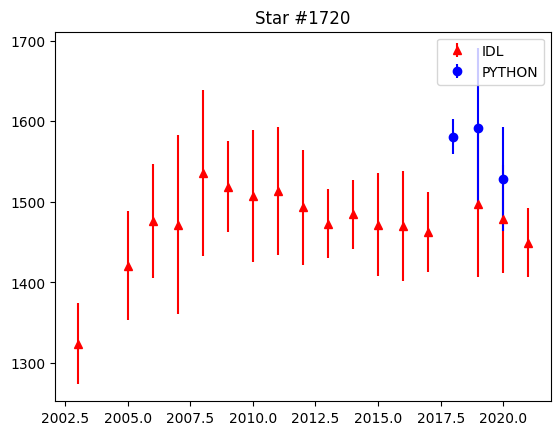

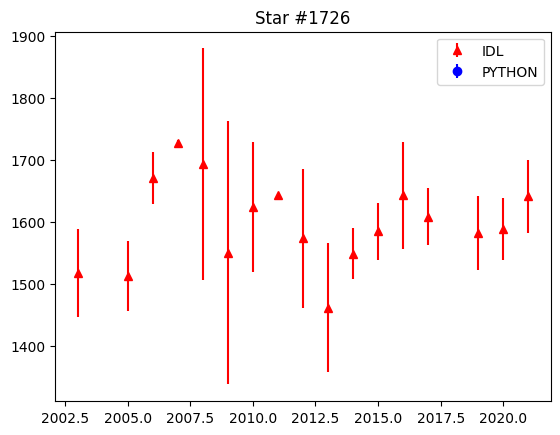

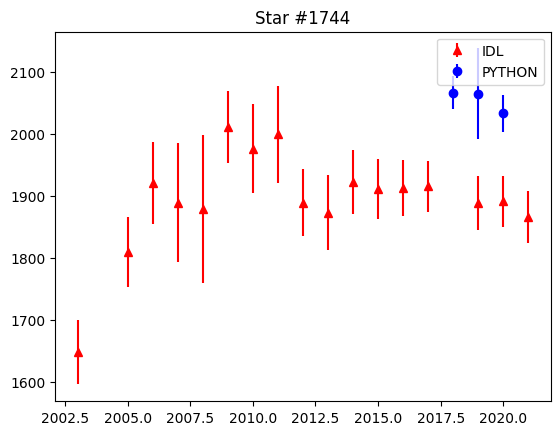

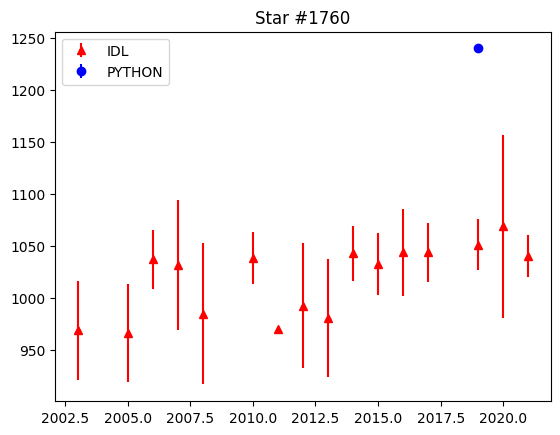

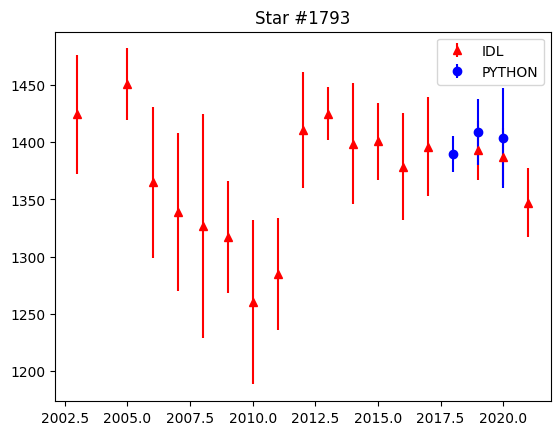

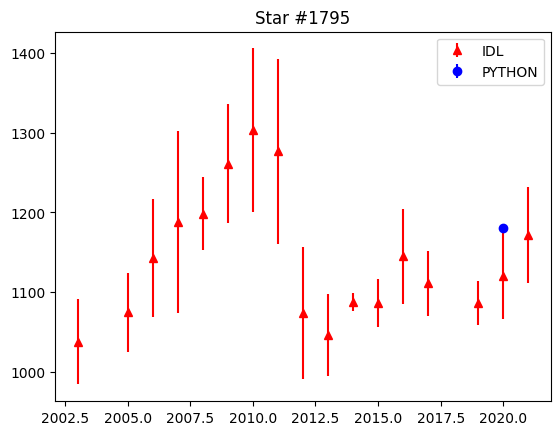

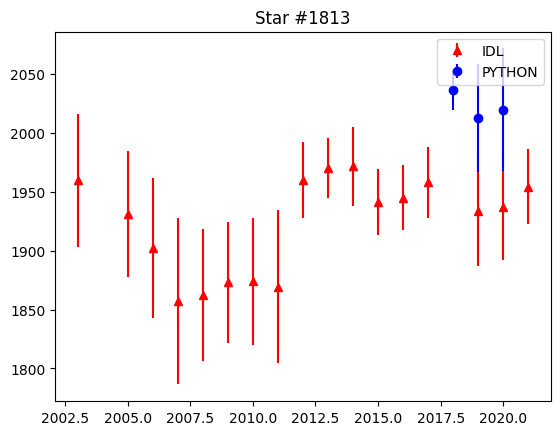

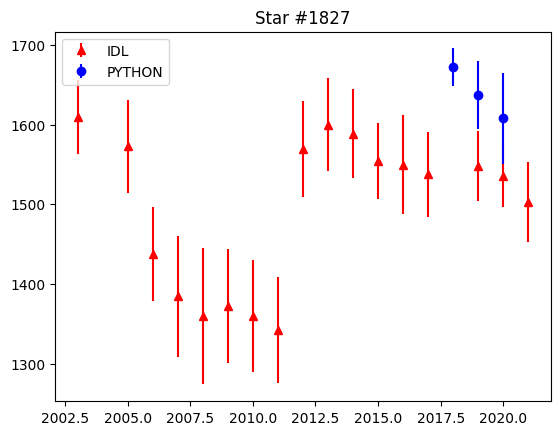

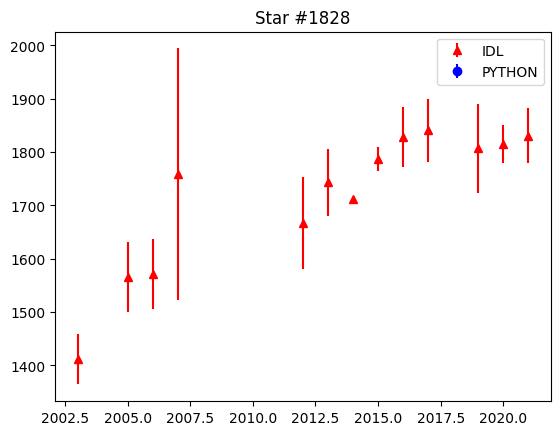

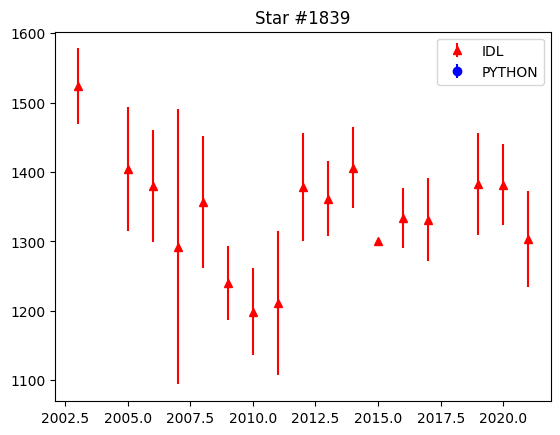

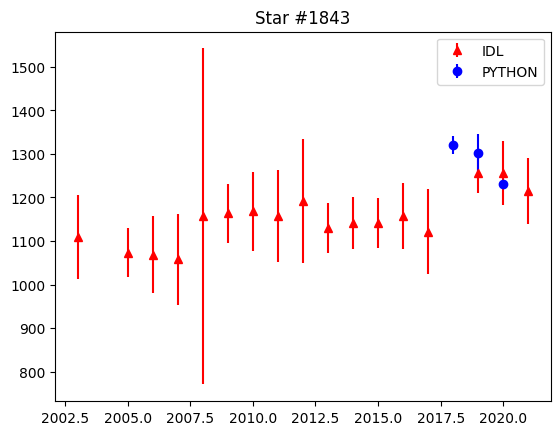

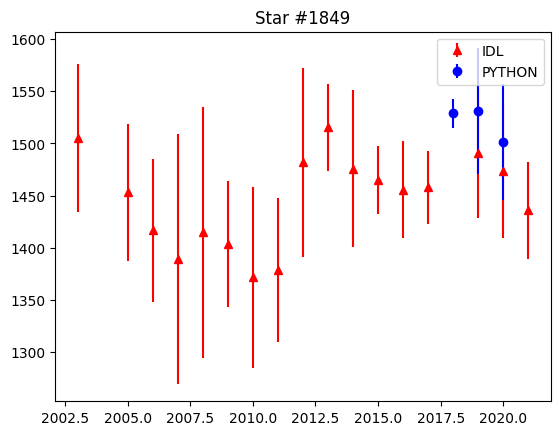

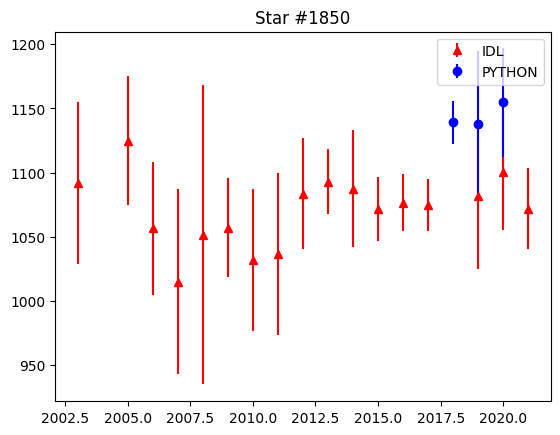

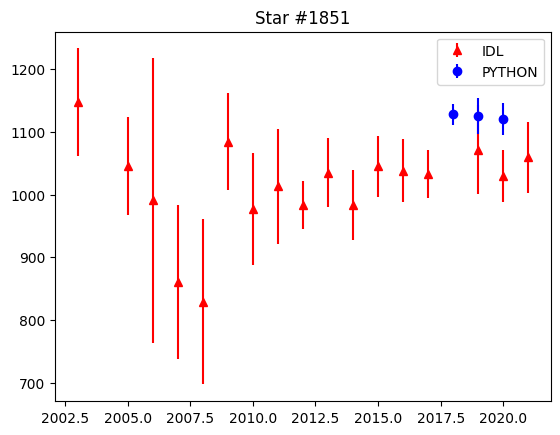

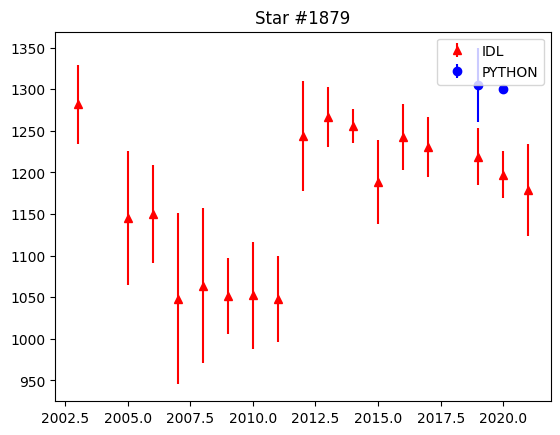

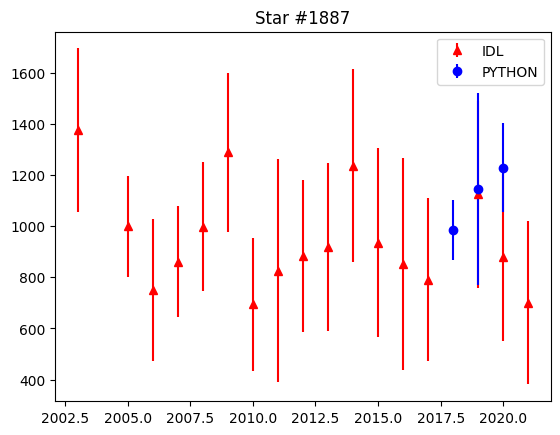

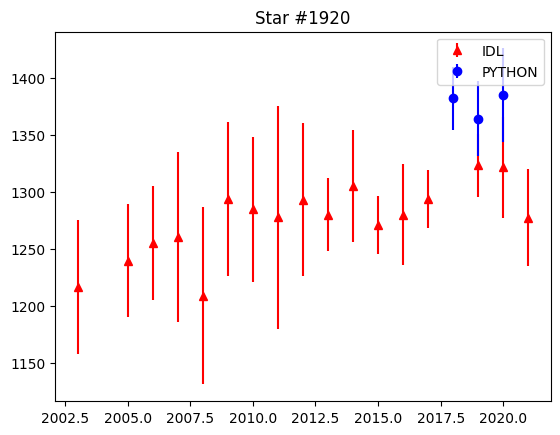

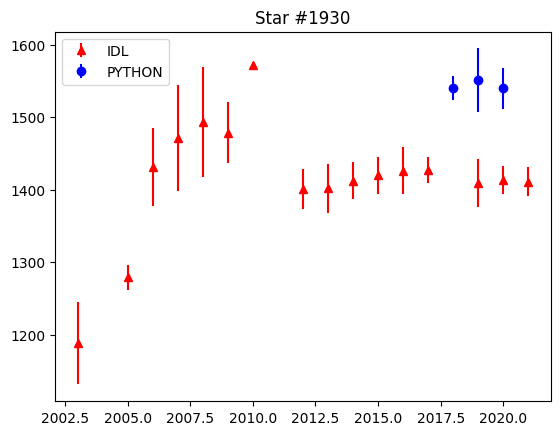

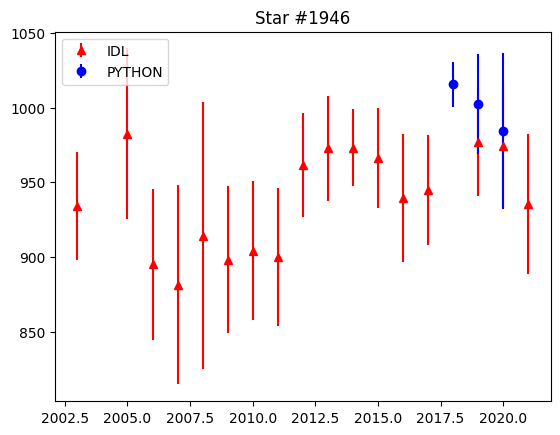

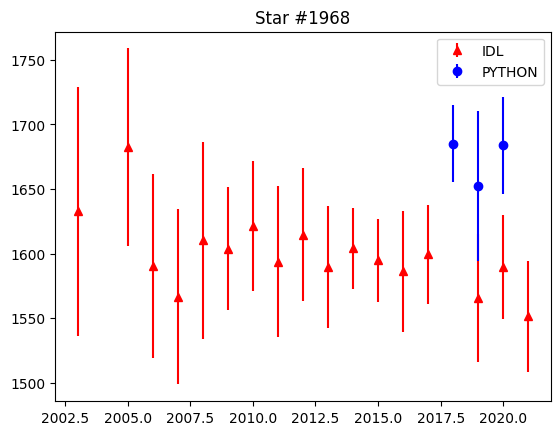

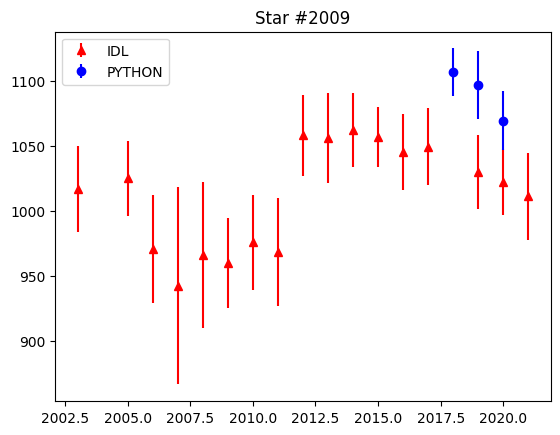

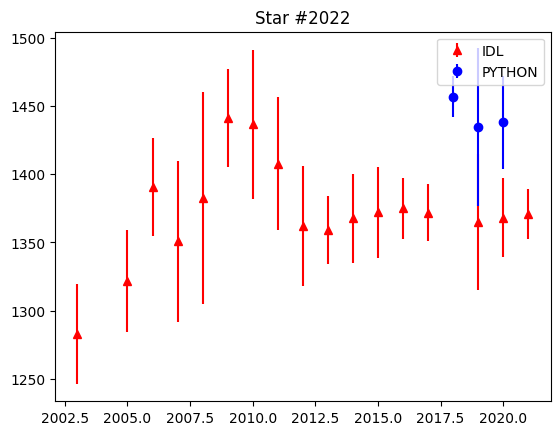

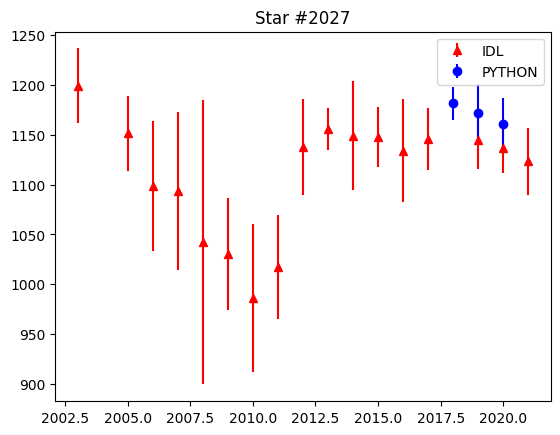

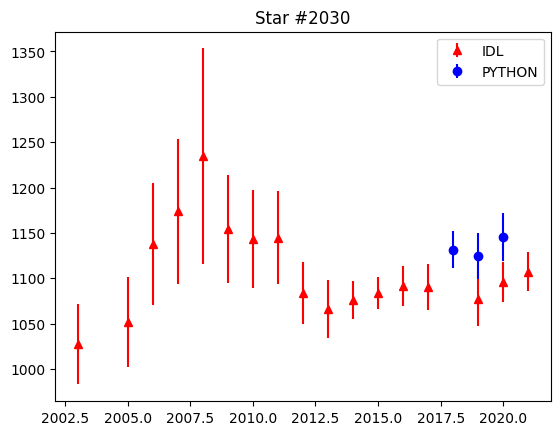

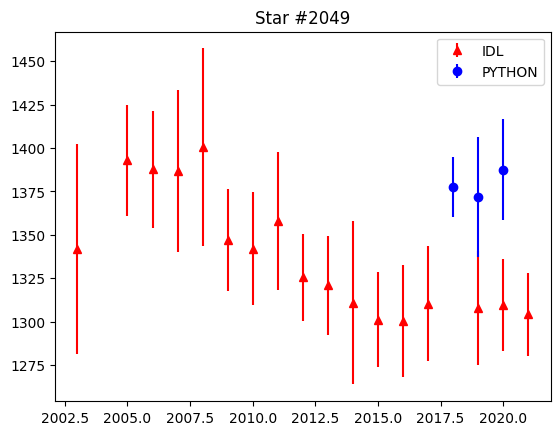

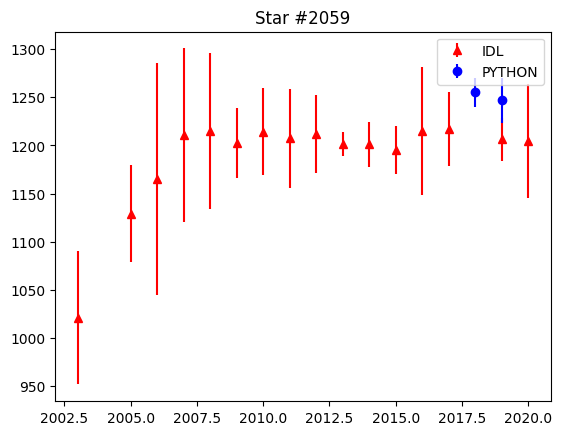

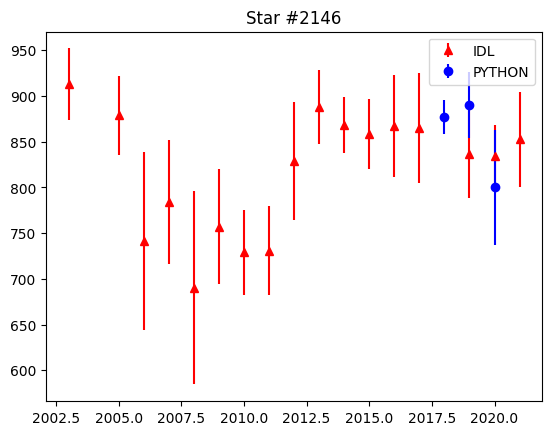

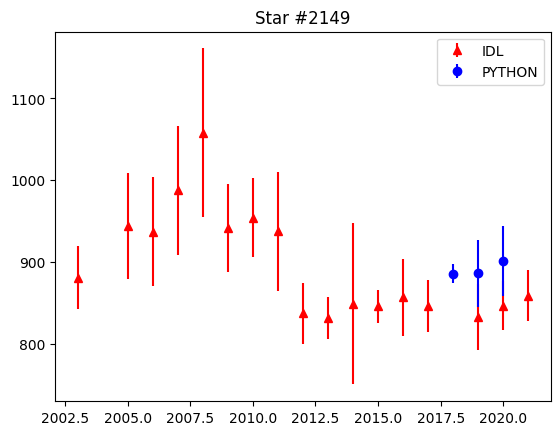

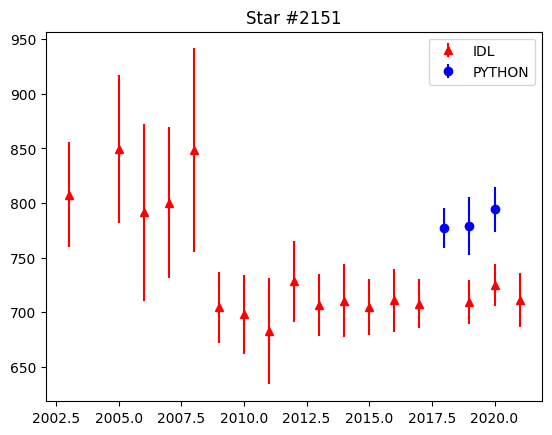

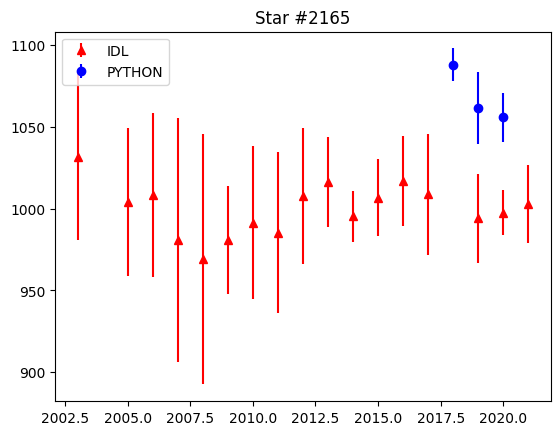

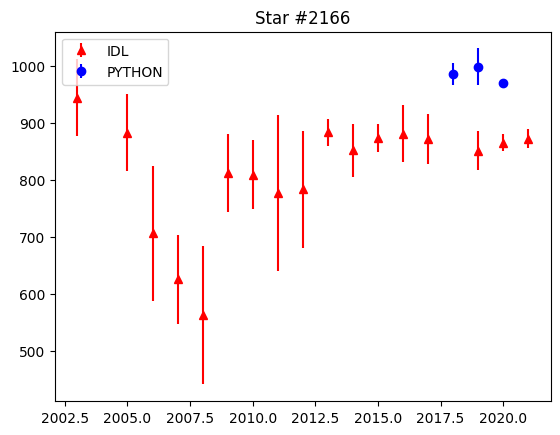

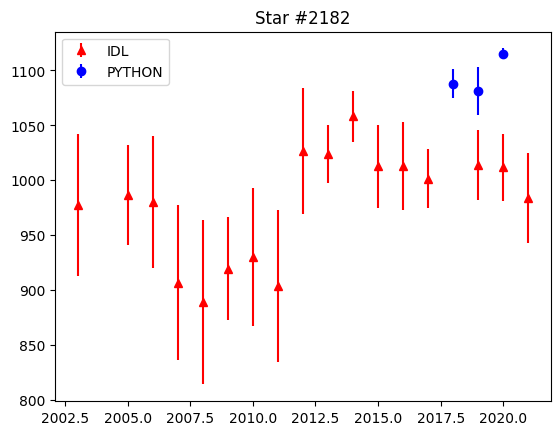

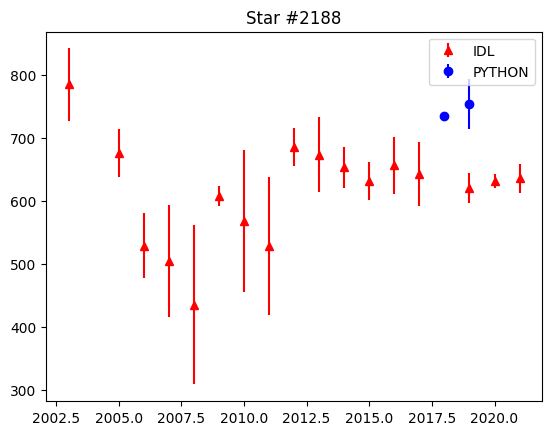

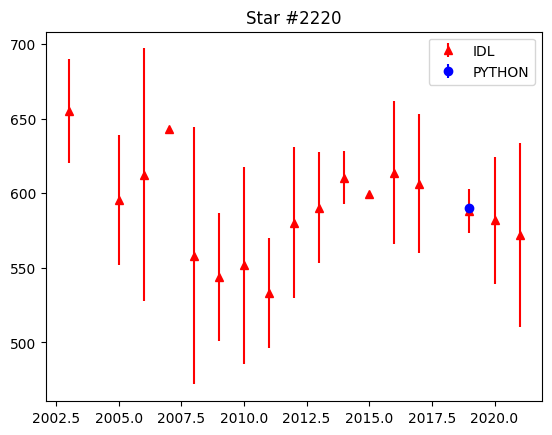

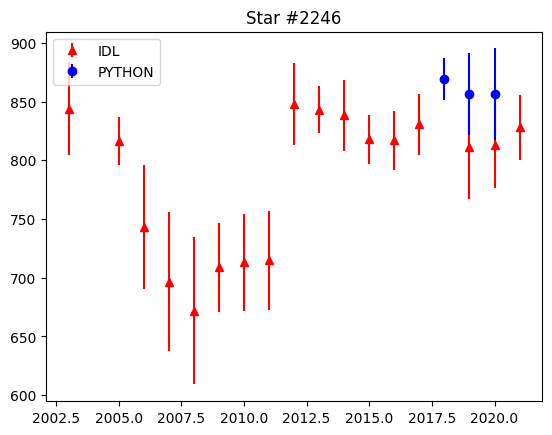

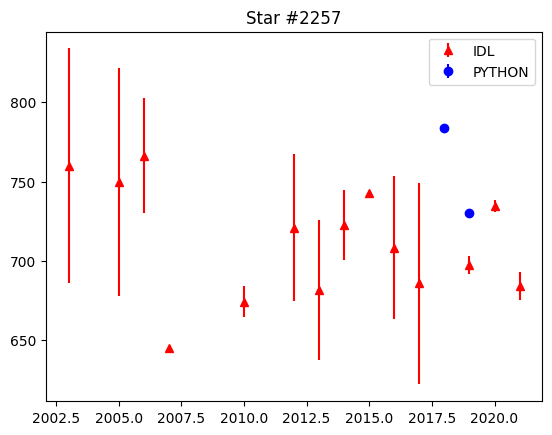

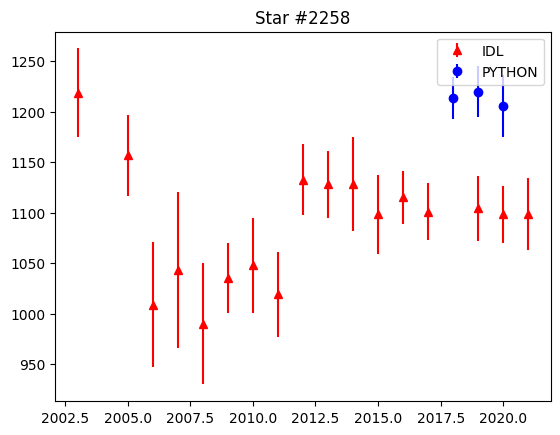

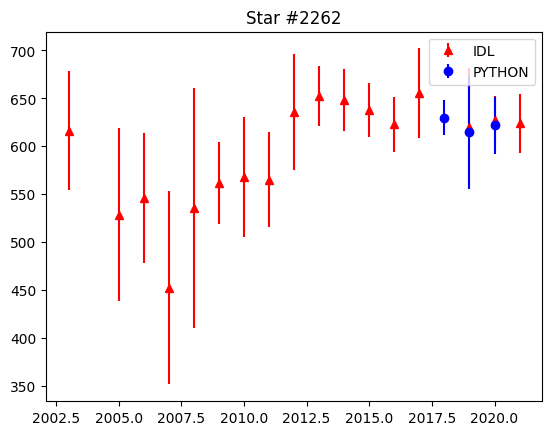

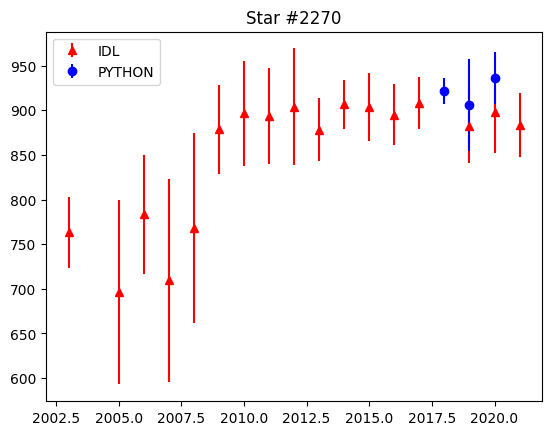

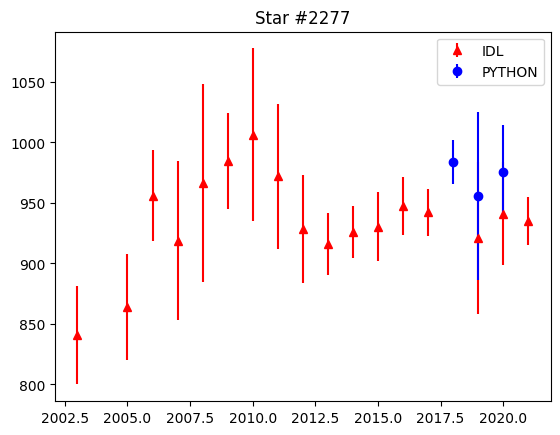

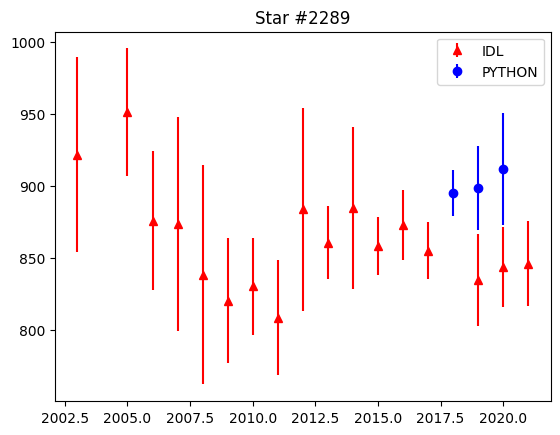

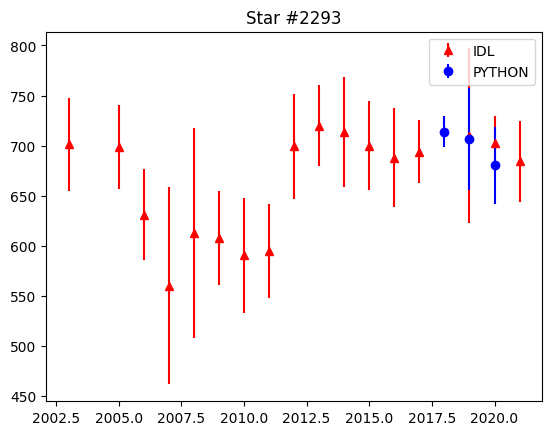

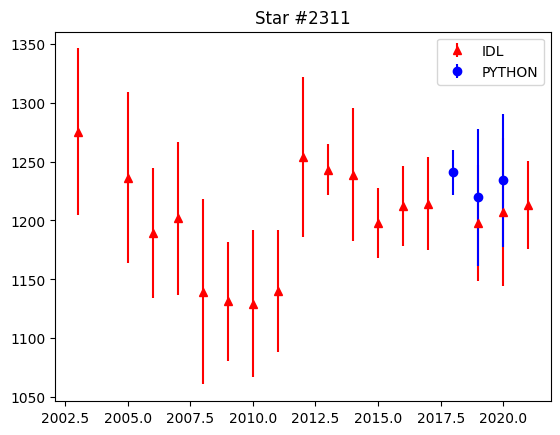

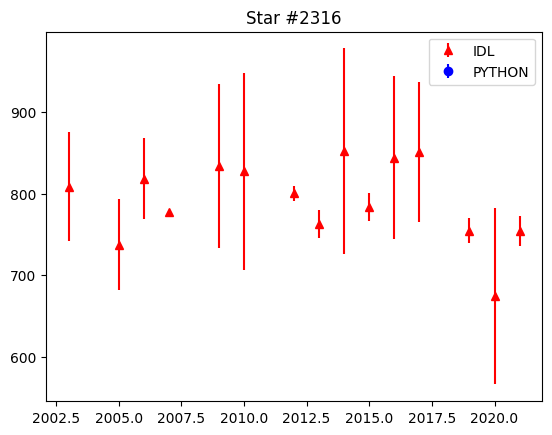

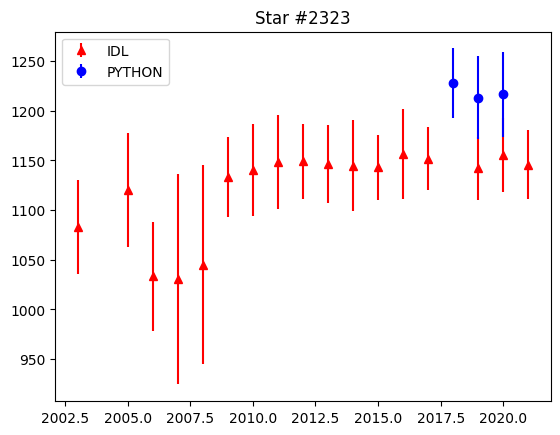

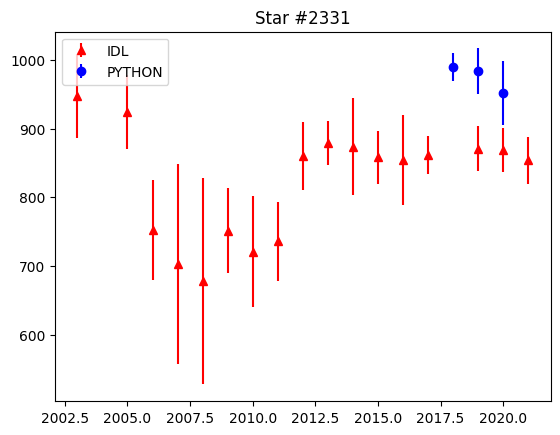

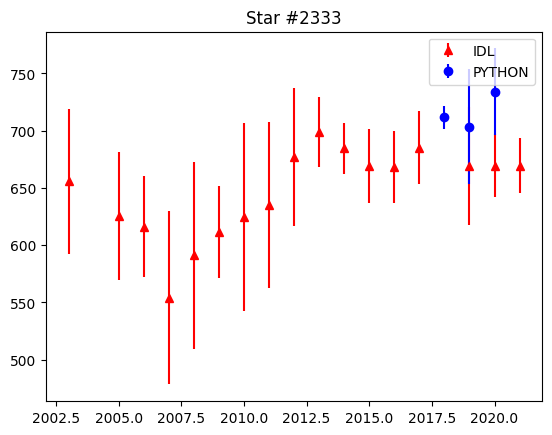

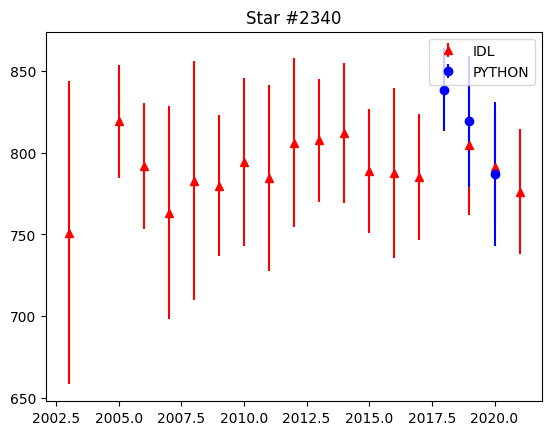

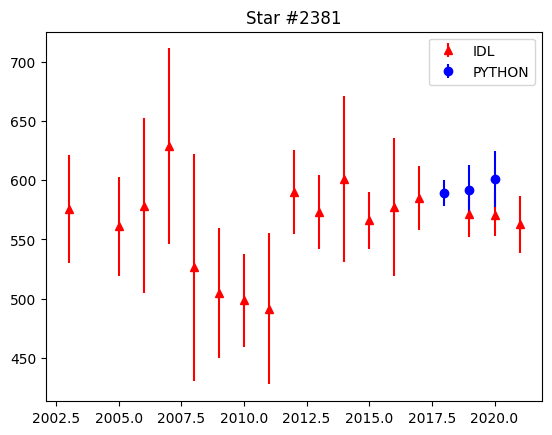

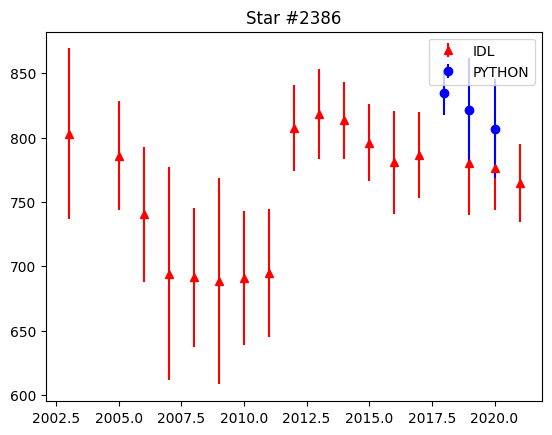

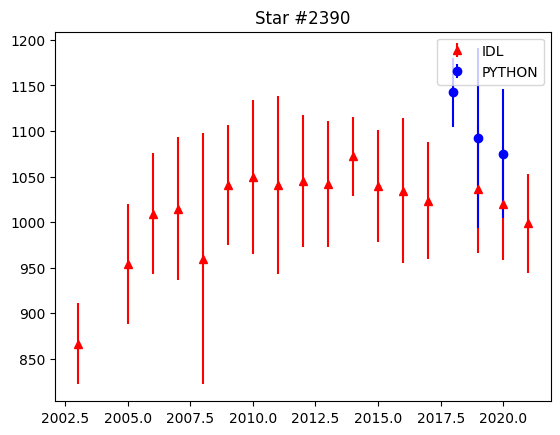

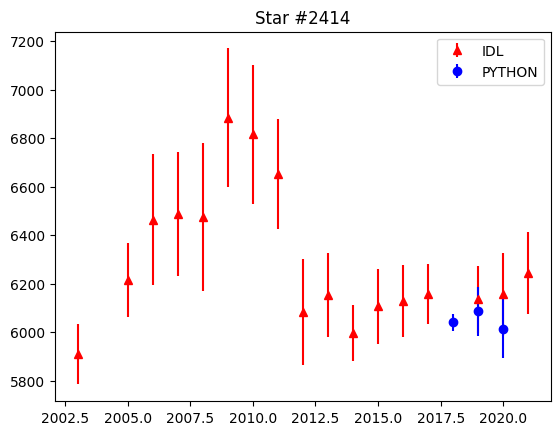

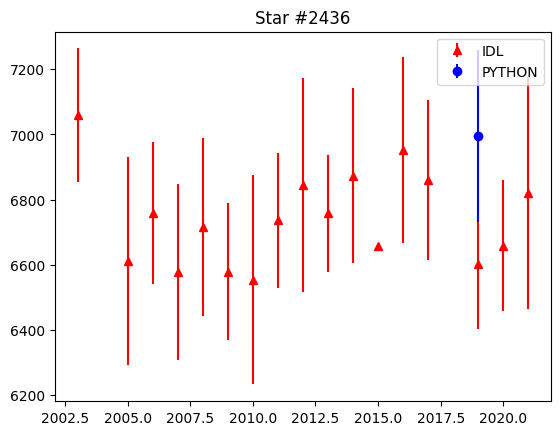

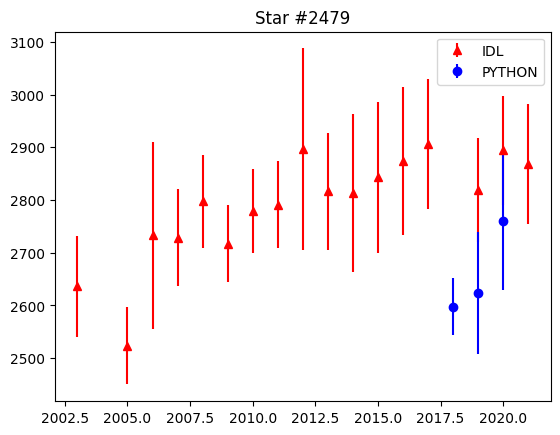

In [110]:
for star in get_sample_stars(200):
    show_chart(star)